# **====== STAGE 2 ======**
`Stage 2 (Data PreProcessing)`

# **🏝 Data Cleansing/Preprocessing 🏝**

## **📌 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
# import warnings 
# warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('float_format', '{:f}'.format)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

## **📌 Import  Raw Datasets**

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/data/marketing_campaign.csv'
source = 'marketing_campaign.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source, sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'Complain', 'Response']
            
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

## **📌 Handling Missing Value**

Melakukan pengecekan jumlah Missing Values dan Persentase nya

In [4]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                     Total Null Values  Percentage Data Type
Income                              24    1.071429     int64
ID                                   0    0.000000     int64
Z_CostContact                        0    0.000000     int64
Complain                             0    0.000000    object
AcceptedCmp2                         0    0.000000    object
AcceptedCmp1                         0    0.000000   float64
AcceptedCmp5                         0    0.000000     int64
AcceptedCmp4                         0    0.000000     int64
AcceptedCmp3                         0    0.000000    object
NumWebVisitsMonth                    0    0.000000     int64
NumStorePurchases                    0    0.000000     int64
NumCatalogPurchases                  0    0.000000     int64
NumWebPurchases                      0    0.000000     int64
NumDealsPurchases                    0    0.000000     int64
Z_Revenue                            0    0.000000     in

Berdasarkan hasil analisa awal, dapat diketahui bahwa terdapat data kosong pada kolom income sebanyak 24 baris dengan persentase sebesar 1,07% dari keseluruhan data.

>

Pada proses handling missing values untuk kolom `Income` ada beberapa metode yang dapat di lakukan :
- **Drop Rows Missing Values**
- **Imputation Median**
    - `Fillna` or `SimpleImputer`
- **Multivariate Approach**
    - Perlu dipastikan untuk data yang dimiliki semaunya dalam bentuk tipe numerical (categorical encoding)
        - `Label Encoding` : `Education`
            - `LabelEncoder` or `Mapping`
        - `One Hot Encoding` : `Marital Status`
            - `get_dummies` or `OneHotEncoder`
    - Kita juga drop kolom yang tidak penting seperti data tanggal `Dt_Customer`
    - Metode :
        - `KNNImputer` or K-Nearest Neighbor
        - `MICE` or Multiple Imputation by Chained Equation      
            - Imputation using MICE with `IterativeImputer`
            - Imputation using MICE with `LightGBM`
            
**Choice Determination:**

- Pada proses handling missing values ini kita menggunakan `Imputation using MICE with LightGBM`

### **Drop Rows**

karena data yang kita miliki terbatas maka untuk proses ini tidak akan kita gunakan

In [5]:
# print("Jumlah rows sebelum drop missing values =", df.shape[0])
# df = df.dropna(subset=['Income'])
# print("Jumlah rows setelah drop missing values =", df.shape[0])
# df.isna().sum()

### **Imputation**

Imputation (Median), karena Highly Positively Skewed

In [6]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

Imputation using `fillna`

In [7]:
# df['Income'].fillna(df['Income'].median(), inplace=True)
# df.isna().sum()

Imputation using `SimpleImputer`

In [8]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# df["Income"] = imputer.fit_transform(df[["Income"]])
# df["Income"].isna().sum()

In [9]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

### **Multivariate Approach**

Multivariate Approach (MICE Imputation, KNN Imputer, dll)

#### **Transform Temporary Data**

Transform beberapa kolom object/string, karena penggunaan multivariate approch memerlukan semua kolom numeric

In [10]:
df_ma = df.copy()

**Transform 1 - Label Encoding**

1. Menggunakan `LabelEncoder`

In [11]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(df_ma['Education'])
# df_ma['Education'] = le.transform(df_ma['Education'])
# print(le.classes_)

2. Menggunakan Metode `Mapping`

In [12]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}

df_ma['Education'] = df_ma['Education'].map(map_edu)
df_ma['Education'].unique()

array([1, 3, 2, 0], dtype=int64)

**Transform 2 - One Hot Encoding**

1. Menggunakan `get_dummies`

In [13]:
# # Not Auto Drop Columns
# ohe = pd.get_dummies(df_ma["Marital_Status"])
# df_ma.drop("Marital_Status", axis=1, inplace=True)
# df_ma = df_ma.join(ohe)

# # cara 2 : Auto drop Column
# # df_ma = pd.get_dummies(data=df_ma, columns=["Marital_Status"])

# df_ma.head()

2. Menggunakan `OneHotEncoder`

In [14]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe = pd.DataFrame(
    oh.fit_transform(df_ma[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
df_ma.drop("Marital_Status", axis=1, inplace=True)

print(oh.categories_[0])
df_ma = pd.concat([df_ma, df_ohe], axis=1)

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


**Transform 3 - Drop Date Columns**

In [15]:
df_ma = df_ma.drop("Dt_Customer", axis=1)

In [16]:
df_ma.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,5524,1957,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### **Implementation Multivariate Approach**

**Two main methods we use here to impute missing values**

- `KNN Imputer` or K-Nearest Neighbor
- `MICE` or Multiple Imputation by Chained Equation

Here, Multiple imputations are performed using `sklearn` and `fancyimpute`.

**To install fancyimpute**

`pip install fancyimpute`

#### **Imputation using `KNNImputer`**

In [17]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

In [18]:
# from sklearn.impute import KNNImputer

# knn_imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [19]:
# from fancyimpute import KNN

# knn_imputer = KNN()
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [20]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

#### **Imputation using `MICE` with `IterativeImputer`**

MICE Imputation, short for ‘Multiple Imputation by Chained Equation’ is an advanced missing data imputation technique that uses multiple iterations of Machine Learning model training to predict the missing values using known values from other features in the data as predictors.

In [21]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

In [22]:
# # Note: make sure to import the enable_iterative_imputer function before 
# # you import the IterativeImputer, as the feature is classified as 
# # experimental, and failing to do so will result in an ImportError.
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(max_iter=10, random_state=0)
# df_imputed = pd.DataFrame(
#     imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [23]:
# from fancyimpute import IterativeImputer
# mice_imputer = IterativeImputer()
# # filling the missing value with mice imputer
# df_imputed = pd.DataFrame(
#     mice_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [24]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

#### **Imputation using `MICE` with `LightGBM`**

MICE imputation can be made more efficient using the `miceforest` package. It is expected to perform significantly better because it implements `lightgbm` algorithm in the backend to do the imputation.

This package can be installed using either pip or conda, through conda-forge:

- Using pip 

    `pip install miceforest --no-cache-dir`

- Using conda

    `conda install -c conda-forge miceforest`

In [25]:
print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

Jumlah missing values Income sebelum Imputation = 24


In [26]:
import miceforest as mf

# Create kernel. 
kds = mf.ImputationKernel(
  df_ma,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm
kds.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
df_imputed = kds.complete_data()
df["Income"] = df_imputed["Income"].copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [27]:
print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

Jumlah missing values Income setelah Imputation = 0


### **Kesimpulan**

Berdasarkan hasil pengecekan, Untuk kolom `Income` terdapat missing values 24 rows (1,07%). Dikarenakan data kita terbatas, sehingga untuk prosesnya kita tidak akan melakukan penghapusan baris (Drop Rows), melainkan dilakukan proses Imputation. 

Pada proses handling missing values ini kita menggunakan `Imputation using MICE with LightGBM`. Imputasi MICE dapat lebih efisien menggunakan `miceforest` karena diharapkan kinerjanya jauh lebih baik karena mengimplementasikan algortima `lightgbm` di backend untuk melakukan imputasi. `LightGBM` dikenal dengan akurasi prediksi yang tinggi. Menggabungkannya dengan algortima `mice` menjadikannya algortima yang kuat untuk imputasi.

## **📌 Handling Duplicate Rows**

In [28]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [29]:
df.duplicated().sum()

0

In [30]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (2240, 29)
Data Frame Dimension After Duplicate Removal: (2240, 29)


In [31]:
df.duplicated(subset=["ID"]).sum()

0

### **Kesimpulan**

- Berdasarkan hasil pengecekan, tidak ditemui baris data yang memiliki duplikat. Sehingga kami tidak perlu melakukan handling duplicated data
- Pada pengecekan duplikat subset untuk ID tidak ditemukan ada nya ID customer yang sama

## **📌 Handling Invalid Values**

Mengecek isi unique values dari data

In [32]:
for x in df.columns : 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

===== Marital_Status =====
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

===== Income =====
[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
['2012-09-04', '2014-03-08', '2013-08-21', '2014-02-10', '2014-01-19', '2013-09-09', '2012-11-13', '2013-05-08', '2013-06-06', '2014-03-13', '.....']

===== Recency =====
[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, '.....']

===== MntWines =====
[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, '.....']

===== MntFruits =====
[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, '.....']

===== MntMeatProducts =====
[546, 6, 127, 20, 118, 98, 164, 56

### **1. Melakukan konversi data `Date`**

Untuk mempermudah dalam proses feature extraction/engineering maka untuk data yang mengandung datetime akan dilakukan konversi ke format datetime pandas

In [33]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

### **2. Melakukan penyederhanaan `Marital_Status`**

Akan dilakukan replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data

- Mengganti kategori `Widow`, `Alone`, `Absurd`, `YOLO` menjadi `Single`
- Mengganti kategori `Together` menjadi `Married`
- Mempertahankan kategori `Divorced`

In [34]:
# Mengganti kategori 'Widow', 'Alone', 'Absurd', 'YOLO' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Widow', 'Alone', 'Absurd', 'YOLO'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [35]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

### **3. Melakukan penyederhanaan `Education_Simple`**

Untuk kategori `2n Cycle` dan `Master` juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori `2n Cycle` akan dihapus dan digantikan dengan kategori `Master`.

In [36]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

In [37]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Kesimpulan**
Berdasarkan hasil pengecekan, Untuk kolom `Dt_Customer` sebelumnya masih berbentuk string/object, untuk tipe datanya kurang sesuai sehingga di ubah menjadi Datetime untuk diolah pada tahap Feature Engineering. Kemudian pada `Marital_Status` dan `Education` replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data.

## **📌 Handling Outliers**

Mengecek Outlier pada tiap columns

In [38]:
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 2240
Outlier All Data : 706
Not Outlier All Data : 1534



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Year_Birth,True,1932.0,2004.0,3,2237
1,Income,True,-14290.5,118153.5,8,2232
2,Kidhome,False,-1.5,2.5,0,2240
3,Teenhome,False,-1.5,2.5,0,2240
4,Recency,False,-51.0,149.0,0,2240
5,MntWines,True,-697.0,1225.0,35,2205
6,MntFruits,True,-47.0,81.0,227,2013
7,MntMeatProducts,True,-308.0,556.0,175,2065
8,MntFishProducts,True,-67.5,120.5,223,2017
9,MntSweetProducts,True,-47.0,81.0,248,1992


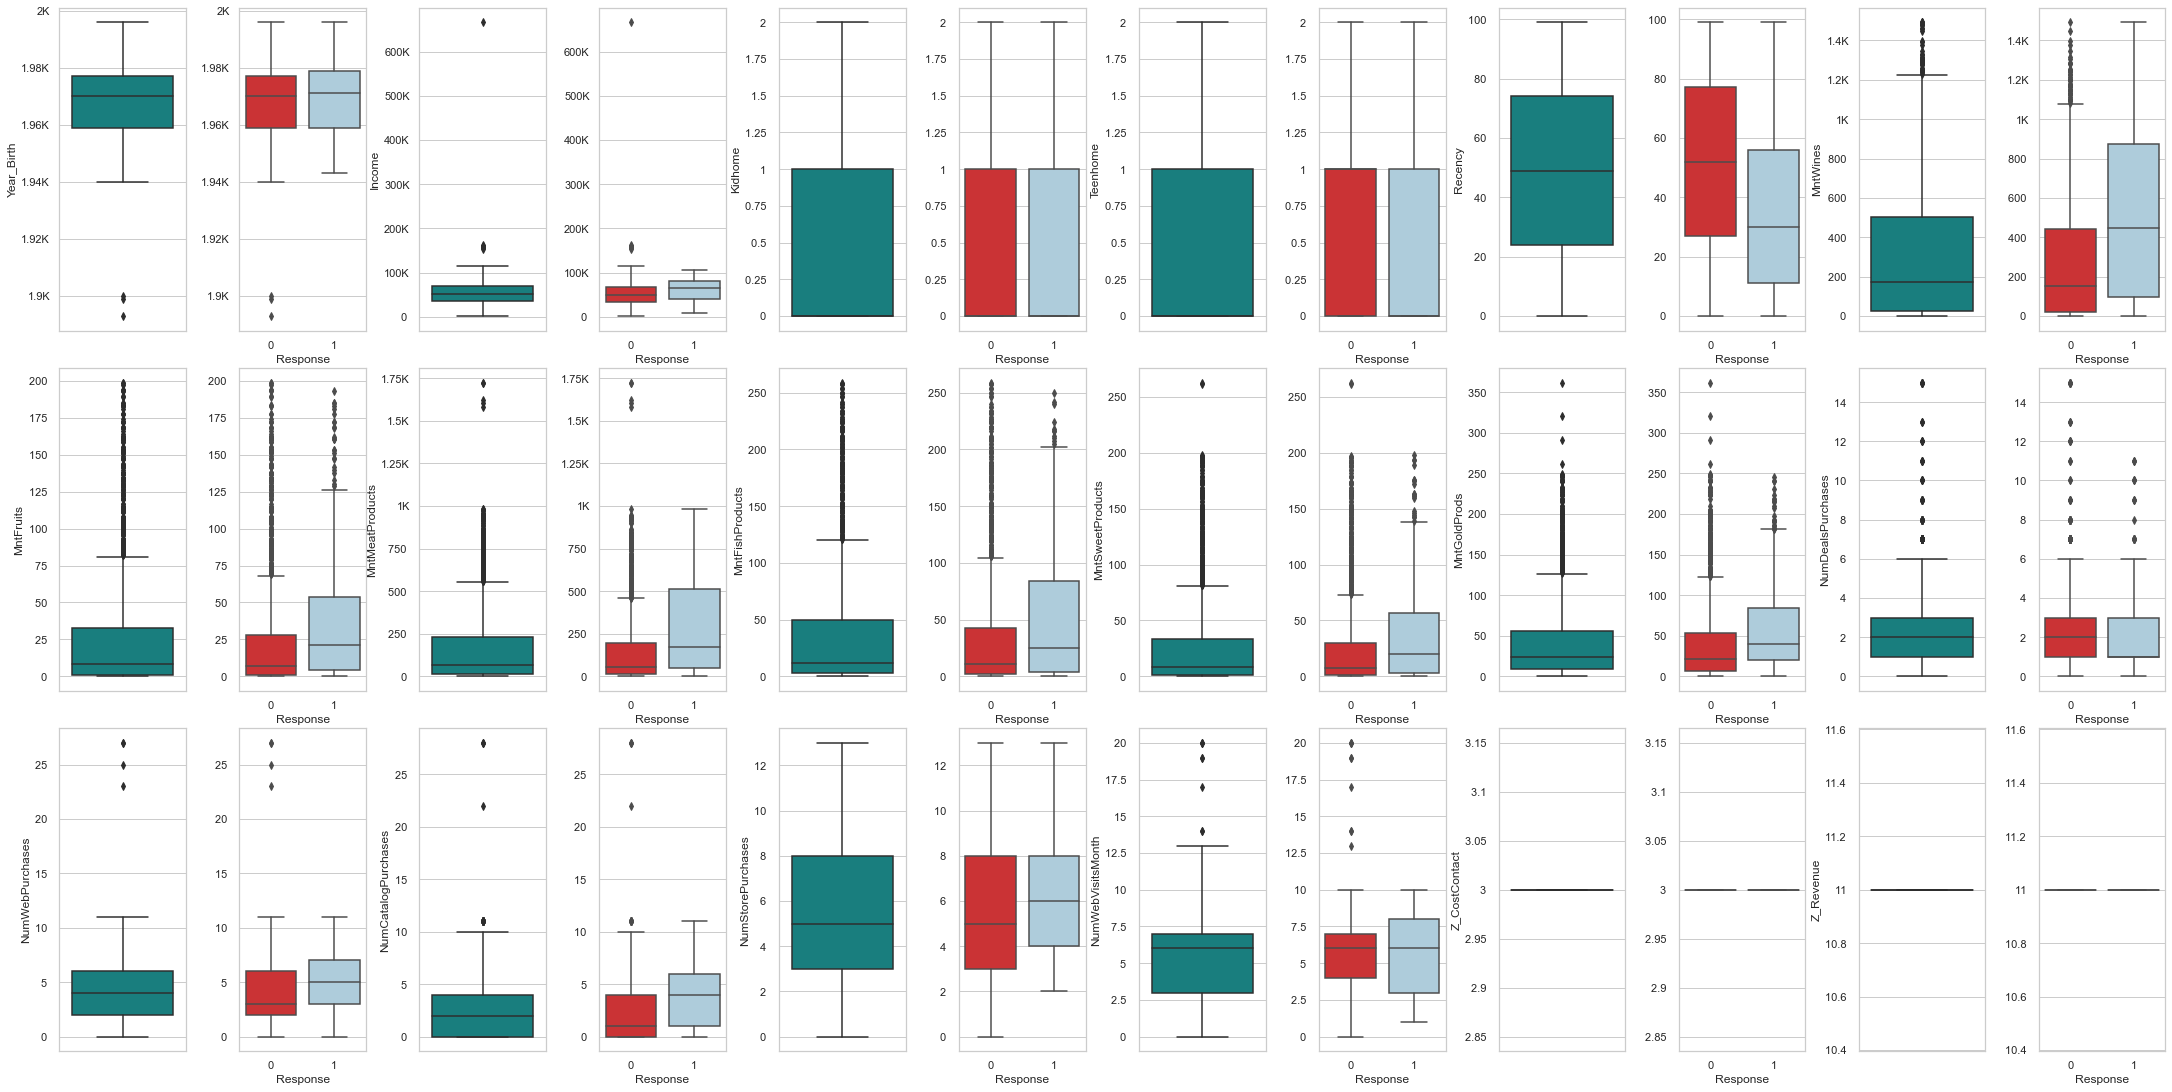

In [39]:
from math import log10, floor
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

plt.figure(figsize=(30, 15))
n = 3
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(num_cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+1)
    sns.boxplot(y=df[num_cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[num_cols[j]], orient='v', palette=colors)
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

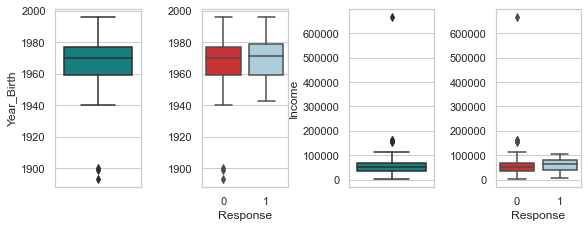

In [40]:
cols = ["Year_Birth","Income"]

plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [41]:
df[["Year_Birth", "Income"]].describe()

,Year_Birth,Income
count,2240.000000,2240.000000
mean,1968.805804,52266.220089
std,11.984069,25129.051708
min,1893.000000,1730.000000
25%,1959.000000,35376.000000
50%,1970.000000,51381.500000
75%,1977.000000,68487.000000
max,1996.000000,666666.000000


Karena pada kolom `Year_Birth` memiliki nilai min yang sangat jauh di tahun `1893-1900`

dan `Income` memiliki nilai max yang sangat tinggi sebesar `$666.666`

Maka akan dilakukan Penghapusan rows pada nilai ini agar tidak ada ketimpangan nilai. Ada beberapa metode yang dapat kita lakukan :
- **Handling Oulier**
    - IQR (Interquartile Range)
    - Z-Score
- **Manually Trimmed**

**Choice Determination:**

- Untuk kasus saat ini, akan digunakan metode `Manually Trimmed`, agar menghindari penghapusan data yang terlalu banyak jika menggunakan Handling Outlier
- Adapaun pada kolom lainnya `selain Year_Birth dan Income` yang terdapat outlier tidak kita handle karena akan melalui proses `Normal Distribution Transformation` nantinya yang akan `mereduksi outliernya.`

### **IQR (Interquartile Range)**

IQR to be more robust since outliers are not included in the calculation of percentiles.

In [42]:
# def handling_outliers_iqr(data, cols):
#     q1 = data[cols].quantile(q=0.25)
#     q3 = data[cols].quantile(q=0.75)
#     iqr = q3-q1
#     fence_low  = q1 - 1.5*iqr
#     fence_high = q3 + 1.5*iqr
    
#     lower_outlier = data[data[cols] < fence_low]
#     upper_outlier = data[data[cols] > fence_high]
    
#     filter_outliers = (data[cols] >= fence_low) & (data[cols] <= fence_high)
#     filtered = data[filter_outliers]
#     return filtered

# cols = ["Year_Birth","Income"]
# print("Jumlah data sebelum handling outliers :", df.shape[0])

# for i in cols:
#     df = handling_outliers_iqr(df, i)
#     print("Jumlah data setelah handling outliers ({}) : {}".format(i, df.shape[0]))

### **Z-Score**

Z-score is highly dependent on normality. If your data is non-normal (bimodal, extreme outlier, etc) then z-score will give poor results since the outliers are included in the mean and standard deviation calculations.

In [43]:
# from scipy import stats
# def handling_outliers_zscore(data, cols):
#     thres = 3
#     mean = np.mean(df[cols])
#     std = np.std(df[cols])
#     zscore = abs((df[cols]-mean)/std)
#     # zscore = abs(stats.zscore(data[cols]))
    
#     outlier = data[zscore >= thres]
    
#     filter_outliers = zscore < thres # negative value none, bcs absolute
#     filtered = data[filter_outliers]
#     return filtered

# cols = ["Year_Birth","Income"]
# print("Jumlah data sebelum handling outliers :", df.shape[0])

# for i in cols:
#     df = handling_outliers_zscore(df, i) 
#     print("Jumlah data setelah handling outliers ({}) : {}".format(i, df.shape[0]))

### **Manually Trimmed**

- Kolom `Year_Birth`, menghapus nilai yang sangat jauh di tahun `1893-1900`
- Kolom `Income` menghapus nilai yang sangat tinggi sebesar `$666.666`

In [44]:
print("Jumlah data sebelum handling outliers :", df.shape[0])

df = df[~(df["Year_Birth"] <= 1900)]
print("Jumlah data setelah handling outliers (Year_Birth) : {}".format(df.shape[0]))

df = df[~(df["Income"] >= 666666)]
print("Jumlah data setelah handling outliers (Income) : {}".format(df.shape[0]))

Jumlah data sebelum handling outliers : 2240
Jumlah data setelah handling outliers (Year_Birth) : 2237
Jumlah data setelah handling outliers (Income) : 2236


In [45]:
df[["Year_Birth", "Income"]].describe()

,Year_Birth,Income
count,2236.000000,2236.000000
mean,1968.898032,51980.909213
std,11.703281,21518.486256
min,1940.000000,1730.000000
25%,1959.000000,35335.500000
50%,1970.000000,51371.000000
75%,1977.000000,68468.250000
max,1996.000000,162397.000000


**Mengecek hasil Trimmed / Drop Outliers**

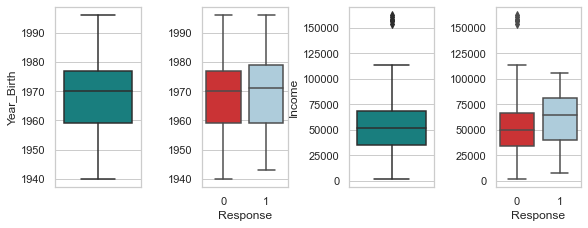

In [46]:
plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [47]:
df.reset_index(drop=True, inplace=True)

### **Kesimpulan**
Berdasarkan hasil perhitungan menggunakan `Z-score` dan juga `IQR`, dapat diketahui bahwa jumlah baris yang dihapus dari `Year_Birth` dan `Income` berdasarkan `IQR` untuk kolom  tidak jauh berbeda dibandingkan dengan `Z-score`, yaitu :
- IQR :
    - Jumlah data sebelum handling outliers : 2240
    - Jumlah data setelah handling outliers (Year_Birth) : 2237
    - Jumlah data setelah handling outliers (Income) : 2229

- Z_Score :
    - Jumlah data sebelum handling outliers : 2240
    - Jumlah data setelah handling outliers (Year_Birth) : 2237
    - Jumlah data setelah handling outliers (Income) : 2229

Namun, karena kita ingin meminimalisasi penghapusan data maka untuk proses ini kita memiliki `Manually Trimmed` agar tidak terlalu banyak data yang dihapus, jadi hanya berfokus pada data yang memiliki jauh yang sangat tinggi

- Jumlah data sebelum handling outliers : 2240
- Jumlah data setelah handling outliers (Year_Birth) : 2237
- Jumlah data setelah handling outliers (Income) : 2236

## **📌 Feature Engineering / Extraction**

Kita akan melakukan Calculation, Extraction, dan Binning features :
- Age Customer
- Age Group
- Has Child
- Dependents
- Month Customer (Lifetime)
- Spending
- Primer and Tersier product
- Total of Purchases
- Total_Cmp (Accepted Campaign 1-5)
- Ever_Accept (Accepted Campaign 1-5)
- Total Revenue
- Income Segment
- Conversion Rate Web
- Month Joined
- Recency Segment

**Membuat Kolom `Umur / Age`**

Berdasarkan data diketahui basis tahunnya : SAS Institute, 2014

In [48]:
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df['Age'] = currentYear - df['Year_Birth']

**Membuat Kolom `Age Group`** 

[source age group](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.semanticscholar.org%2Fpaper%2FHuman-Age-Group-Classification-Using-Facial-Bhat-V.K.Patil%2F19ddb412336ce633c1fe21544605c7bd65ff8d66&psig=AOvVaw3Sm17zYYJRrkisQVRyg4rf&ust=1684919686463000&source=images&cd=vfe&ved=0CBMQjhxqFwoTCJDXlY2Ni_8CFQAAAAAdAAAAABAI)

<div>
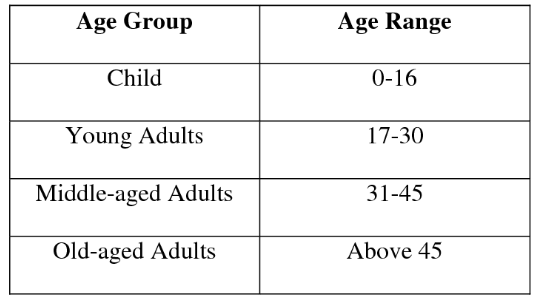
</div>

Akan disederhanakan lagi :
- Young Adult < 30
- Adult 30-45 Tahun
- Senior Adult > 45 tahun

In [49]:
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'
    
    return grup

df['Age_group'] = df["Age"].apply(lambda x: age_group(x))

**Membuat Kolom `Has_child`**

Menggabungkan Kidhome dan Teenhome menjadi feature Has_child, yang mana hasil penjumlahannya yang memiliki anak minimal 1

In [50]:
df['Has_child'] = np.where(df["Kidhome"]+df["Teenhome"] > 0, 1, 0)

**Membuat Kolom `Dependents`**

Jumlah tanggungan dari customer, dari penjumlahan Kidhome dan Teenhome

In [51]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

**Membuat Kolom `Lifetime`**

Sudah berapa bulan customer sejak pembelian pertama di supermarket

In [52]:
df['Lifetime'] = (2014 - df["Dt_Customer"].dt.year)*12 + df["Dt_Customer"].dt.month

**Membuat Kolom `Spending`**

Jumlah pembelian tiap customer pada keseluruhan product

In [53]:
df['Spending']=df['MntWines']+ \
    df['MntFruits']+ \
    df['MntMeatProducts']+ \
    df['MntFishProducts']+ \
    df['MntSweetProducts']+ \
    df['MntGoldProds']

**Membuat Kolom `Primer and Tersier product`**

Jumlah pembelian tiap customer pada kelompok primer dan tersier product

In [54]:
# primer and tersier product
df['Primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['Tersier_purchase'] = df['MntWines']+df['MntSweetProducts']+df["MntGoldProds"]

**Membuat Kolom `Total of Purchases`**

In [55]:
df['Total_Purchases'] = df['NumDealsPurchases'] + \
    df['NumWebPurchases'] + \
    df['NumCatalogPurchases'] + \
    df['NumStorePurchases']

**Membuat Kolom `Total_Cmp`**

Berapa kali tiap customer merespon ke 5 campign yang dilaksanakan (AcceptedCmp 1 - 5)

In [56]:
df['Total_Cmp']=df['AcceptedCmp1'].astype("int64")+ \
    df['AcceptedCmp2'].astype("int64")+ \
    df['AcceptedCmp3'].astype("int64")+ \
    df['AcceptedCmp4'].astype("int64")+ \
    df['AcceptedCmp5'].astype("int64")

**Membuat Kolom `Ever_Accept`**

Apakah Customer pernah minimal sekali menerima campign atau tidak pernah sama sekali

In [57]:
df['Ever_Accept']=df['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

**Membuat Kolom `Total Revenue`**

Jumlah Campaign yang diresponse/accept (Campaign 1-5) dikali dengan revenue = 11

In [58]:
# total revenue
df['Total_revenue'] = (df['Total_Cmp']) * df['Z_Revenue']
df[['Z_Revenue', 'Total_revenue']].sample(5)

,Z_Revenue,Total_revenue
191,11,0
273,11,0
1222,11,0
1536,11,0
164,11,0


**Membuat Kolom `Income Segmentation`**

- None -> Missing values
- High -> >= q3(68468)
- Medium -> q1(35335) - q3(68468)
- Low -> < q1(35335)

In [59]:
Q1 = df["Income"].quantile(.25)
print(Q1)
Q3 = df["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_sgmt"] = df["Income"].fillna("None")
df["Income_sgmt"] = df["Income_sgmt"].apply(lambda x: income_sgmt(x))

35335.5
68468.25


In [60]:
df["Income_sgmt"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

**Membuat Kolom `Conversion Rate Web`**

Perbandingan Total Purchases dengan Jumlah Pengunjung Website

In [61]:
df['Conversion_rate_web'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)
df['Conversion_rate_web'].fillna(0, inplace=True)
df['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

**Membuat Kolom `Month Joined`**

Membuat kolom extraction month dari tanggal Customer pertama kali berbelanja

Note : Untuk nilai tahun tidak digunakan karena berpotensi bias karena dari nilai nya akan increasing tiap waktu, sedangkan month akan repeat pada tiap periode

In [62]:
df['Month_joined'] = df['Dt_Customer'].dt.month

**Membuat Kolom `Recency_sgmt`**

In [63]:
np.sort(df['Recency'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [64]:
num_score = 5
cek = pd.qcut(df['Recency'].unique(), num_score, labels=range(num_score, 0, -1))
cek = pd.DataFrame({
    "value":df['Recency'].unique(),
    "score": cek
})

cek.groupby(['score'])[['value']] \
    .agg(['min', 'max']).sort_index(ascending=False) \
    .style.background_gradient(cmap='Reds')

In [65]:
divided = {5: 19, 4: 39, 3: 59, 2: 79}
 
def RScore(x,d):
    if x <= d[5]:
        return 4
    elif x <= d[4]:
        return 3
    elif x <= d[3]: 
        return 2
    elif x <= d[2]: 
        return 1
    else:
        return 0

df['Recency_sgmt'] = df['Recency'].apply(lambda x: RScore(x, divided))
df.groupby(['Recency_sgmt'])[['Recency']].agg(['min', 'max', 'count']).style.background_gradient(cmap='Reds')

Perkiraan pembagian dengan rentang 19 Hari:
- 4 score -> setengah bulan
- 3 score -> 1 bulan
- 2 score -> 1 setengah bulan
- 1 score -> 2 bulan
- 0 score -> 3 bulan

**Mengecek nilai Extraction**

In [66]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Month_joined,Recency_sgmt
1988,8212,1971,Master,Married,39791.0,0,1,2013-03-28,89,85,15,27,13,13,21,2,3,1,4,7,0,0,0,0,0,0,3,11,0,43,Adult,1,1,15,174,55,119,10,0,0,0,Medium,1.43,3,0
209,2677,1956,Graduation,Married,46097.0,0,1,2013-03-31,11,72,24,68,65,4,8,5,3,1,6,4,0,0,0,0,0,0,3,11,0,58,Senior Adult,1,1,15,241,157,84,15,0,0,0,Medium,3.75,3,4
1700,1958,1973,PhD,Married,55012.0,0,1,2014-03-21,85,582,0,65,0,0,13,6,8,2,9,5,0,0,0,0,0,0,3,11,0,41,Adult,1,1,3,660,65,595,25,0,0,0,Medium,5.00,3,0
2152,8933,1983,Master,Married,32146.0,1,0,2014-05-12,16,26,3,23,4,7,3,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31,Adult,1,1,5,66,30,36,8,0,0,0,Low,1.33,5,4
1007,5236,1979,Graduation,Married,77568.0,0,1,2012-08-25,30,1230,0,396,232,178,158,1,10,2,8,5,0,1,1,1,0,0,3,11,0,35,Adult,1,1,32,2194,628,1566,21,3,1,33,High,4.20,8,3


**Categorical (String)**

- Education - Basic, Graduation, Master, PhD
- Marital_Status - Single, Married, Divorced
- Age_group - Young Adult, Adult, Senior Adult
- Income_sgmt - High, Medium, Low

**Categorical (Int)**

- ID
- Kidhome - 0, 1, 2
- Teenhome - 0, 1, 2
- AcceptedCmp1 - 0, 1
- AcceptedCmp2 - 0, 1
- AcceptedCmp3 - 0, 1
- AcceptedCmp4 - 0, 1
- AcceptedCmp5 - 0, 1
- Ever_Accept - 0, 1
- Complain - 0, 1
- Response - 0, 1
- Has_child - 0, 1
- Recency_sgmt - 0, 1, 2, 3, 4

**Numericals**

- Year_Birth = 1940 - 1996
- Income = 1730.0 - 162397.0
- Kidhome = 0 - 2
- Teenhome = 0 - 2
- Recency = 0 - 99
- Age = 18 - 74
- Dependents = 0 - 3
- Lifetime = 1 - 36
- Spending = 5 - 2525
- Primer_purchase = 1 - 1727
- Tersier_purchase = 3 - 1689
- Total_Purchases = 0 - 44
- NumWebVisitsMonth = 0 - 20
- Conversion_rate_web = 0.0 - 43.0
- Total_Cmp = 0 - 4
- Total_revenue = 0 - 44
- Month_joined = 1 - 12

**Numericals (one)**

- Z_CostContact = 3
- Z_Revenue = 11

**Numericals (Product)**

- MntWines = 0 - 1493
- MntFruits = 0 - 199
- MntMeatProducts = 0 - 1725
- MntFishProducts = 0 - 259
- MntSweetProducts = 0 - 263
- MntGoldProds = 0 - 362

**Numericals (Purchases)**

- NumDealsPurchases = 0 - 15
- NumWebPurchases = 0 - 27
- NumCatalogPurchases = 0 - 28
- NumStorePurchases = 0 - 13

**Timestamp**
- Dt_Customer = 2012-07-30 - 2014-06-29

In [67]:
cat_str = ['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']
cat_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
           'Ever_Accept', 'Complain', 'Response', 'Has_child', 'Recency_sgmt']

num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Dependents', 'Lifetime', 'Spending', 
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'NumWebVisitsMonth', 'Conversion_rate_web', 
       'Total_Cmp', 'Total_revenue', 'Month_joined']

num_one = ['Z_CostContact', 'Z_Revenue']

num_product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

timestamp = ["Dt_Customer"]

Mengecek Kolom di pembagian type

In [68]:
allcol = cat_str + cat_int + num + num_one + num_product + num_purchases + timestamp
for i in df:
    if i not in allcol:
        print(i)

In [69]:
#cek unique value
cat_cols = cat_str+cat_int
for x in cat_cols: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

num_cols = num + num_one + num_product + num_purchases
for x in num_cols + timestamp: 
    print("{} = {} - {}".format(x, min(df[x]), max(df[x])))

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic']

===== Marital_Status =====
['Single', 'Married', 'Divorced']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_sgmt =====
['Medium', 'High', 'Low']

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== AcceptedCmp1 =====
[0, 1]

===== AcceptedCmp2 =====
[0, 1]

===== AcceptedCmp3 =====
[0, 1]

===== AcceptedCmp4 =====
[0, 1]

===== AcceptedCmp5 =====
[0, 1]

===== Ever_Accept =====
[0, 1]

===== Complain =====
[0, 1]

===== Response =====
[1, 0]

===== Has_child =====
[0, 1]

===== Recency_sgmt =====
[2, 3, 0, 4, 1]

Year_Birth = 1940 - 1996
Income = 1730.0 - 162397.0
Kidhome = 0 - 2
Teenhome = 0 - 2
Recency = 0 - 99
Age = 18 - 74
Dependents = 0 - 3
Lifetime = 1 - 36
Spending = 5 - 2525
Primer_purchase = 1 - 1727
Tersier_purchase = 3 - 1689
Total_Purchases = 0 - 44
NumWebVisitsMonth = 0 - 20
Conv

In [70]:
new_cols = list(df.columns.values)
new_cols.remove("Response")
new_cols.append("Response")
df = df[new_cols].copy()

In [71]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age',
       'Age_group', 'Has_child', 'Dependents', 'Lifetime', 'Spending',
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'Total_Cmp',
       'Ever_Accept', 'Total_revenue', 'Income_sgmt', 'Conversion_rate_web',
       'Month_joined', 'Recency_sgmt', 'Response'],
      dtype='object')

## **📌 Feature Transformation (Numeric)**

Mengecek Skewness di tiap kolom untuk menentukan jenis Transformation

In [72]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist = dist.sort_values(["Type of Distribution","Column Name"]).reset_index(drop=True)
dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Kidhome,0.636,-0.779,Bimodal Distribution
1,Teenhome,0.406,-0.987,Bimodal Distribution
2,Conversion_rate_web,2.332,6.442,Highly Positively Skewed
3,MntFishProducts,1.919,3.086,Highly Positively Skewed
4,MntFruits,2.103,4.058,Highly Positively Skewed
5,MntGoldProds,1.884,3.548,Highly Positively Skewed
6,MntMeatProducts,2.084,5.515,Highly Positively Skewed
7,MntSweetProducts,2.134,4.360,Highly Positively Skewed
8,MntWines,1.175,0.597,Highly Positively Skewed
9,NumCatalogPurchases,1.880,8.030,Highly Positively Skewed


In [73]:
exclude = ["Kidhome", "Teenhome", "Dependents", "Total_Cmp"]

log_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Positively Skewed") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

norm_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Normal Distribution") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

print("Log Transformation =", log_cols)
print("Normalisasi/Standardization =", norm_cols)

Log Transformation = ['Conversion_rate_web', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'Primer_purchase', 'Spending', 'Tersier_purchase', 'Total_revenue']
Normalisasi/Standardization = ['Age', 'Income', 'Lifetime', 'Month_joined', 'NumWebVisitsMonth', 'Recency', 'Total_Purchases', 'Year_Birth']


Dari hasil temuan, kita dapat menentukan beberapa transformasi yang akan kita lakukan :
- **Scaling and Converting to a Normal Distribution :**
    - log Transformation
    - Box-Cox Transformation
    - Yeo-Johnson Transformation
    
    **Adapun daftar column yang akan kita transform pada proses ini :**
        - Conversion_rate_web
        - MntFishProducts
        - MntFruits
        - MntGoldProds
        - MntMeatProducts
        - MntSweetProducts
        - MntWines
        - NumCatalogPurchases
        - NumDealsPurchases
        - NumStorePurchases
        - NumWebPurchases
        - Primer_purchase
        - Spending
        - Tersier_purchase
        - Total_revenue
    
- **Just Scaling :**
    - Normalization
    - Standardization
    
    **Adapun daftar column yang akan kita transform pada proses ini :**
        - Age
        - Income
        - Lifetime
        - Month_joined
        - NumWebVisitsMonth
        - Recency
        - Total_Purchases
        - Year_Birth

- Sedangkan untuk beberapa kolom yang **tidak perlu melakukan Transformasi** karena rentang nilai yang masih wajar sebagai berikut :
    - Kidhome
    - Teenhome
    - Dependents
    - Total_Cmp

**Choice Determination:**

- Pada proses `Scaling and Converting to a Normal Distribution` ini kita menggunakan `Yeo-Johnson Transformation`, karena dari hasilnya kita bisa melihat hasil bentuk curve yang lebih Normal Distribusi
- Pada proses `Just Scaling` ini kita menggunakan `Normalization` karena lebih robust untuk algoritma yang akan kita gunakan 

### **Log Transformation**

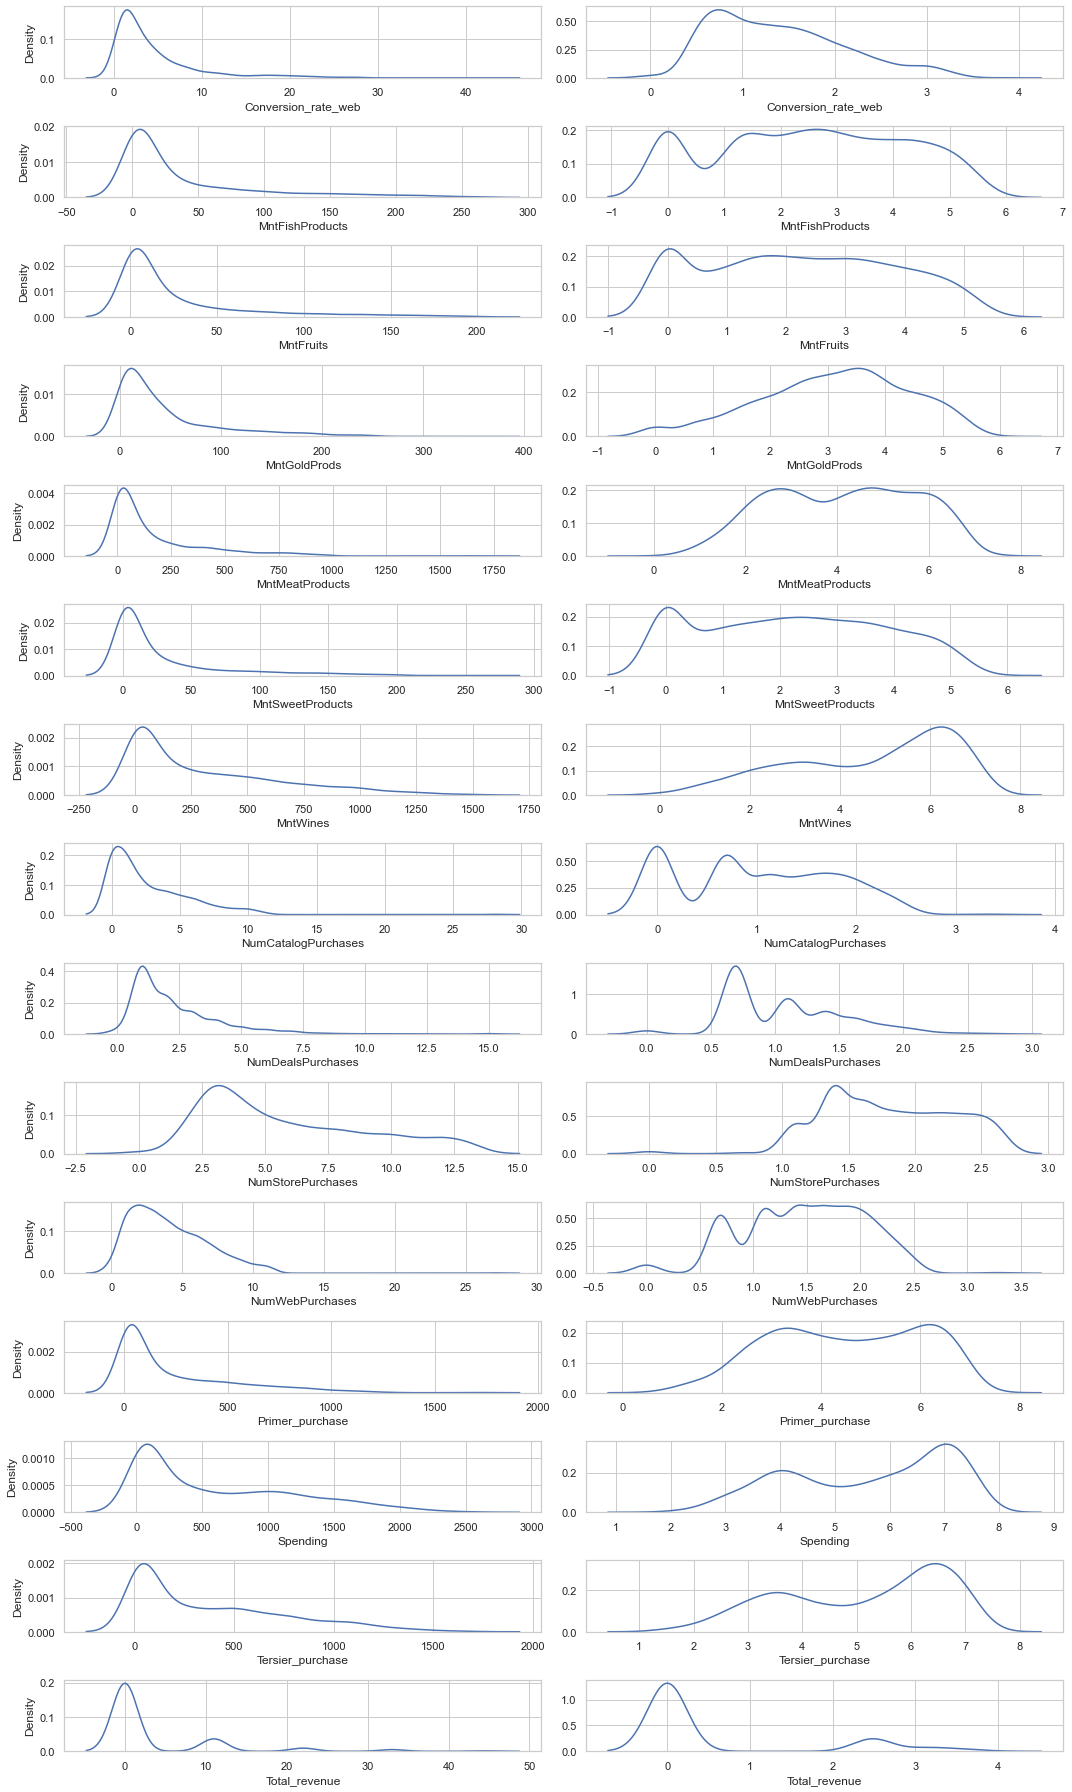

In [74]:
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [75]:
# add 1 bcs err : divide by zero encountered in log
# df[log_cols] = np.log(df[log_cols]+1)
# df[log_cols] = np.log1p(df[log_cols])

In [76]:
# df[log_cols].describe()

### **Box-Cox Transformation**

- **with Scipy**

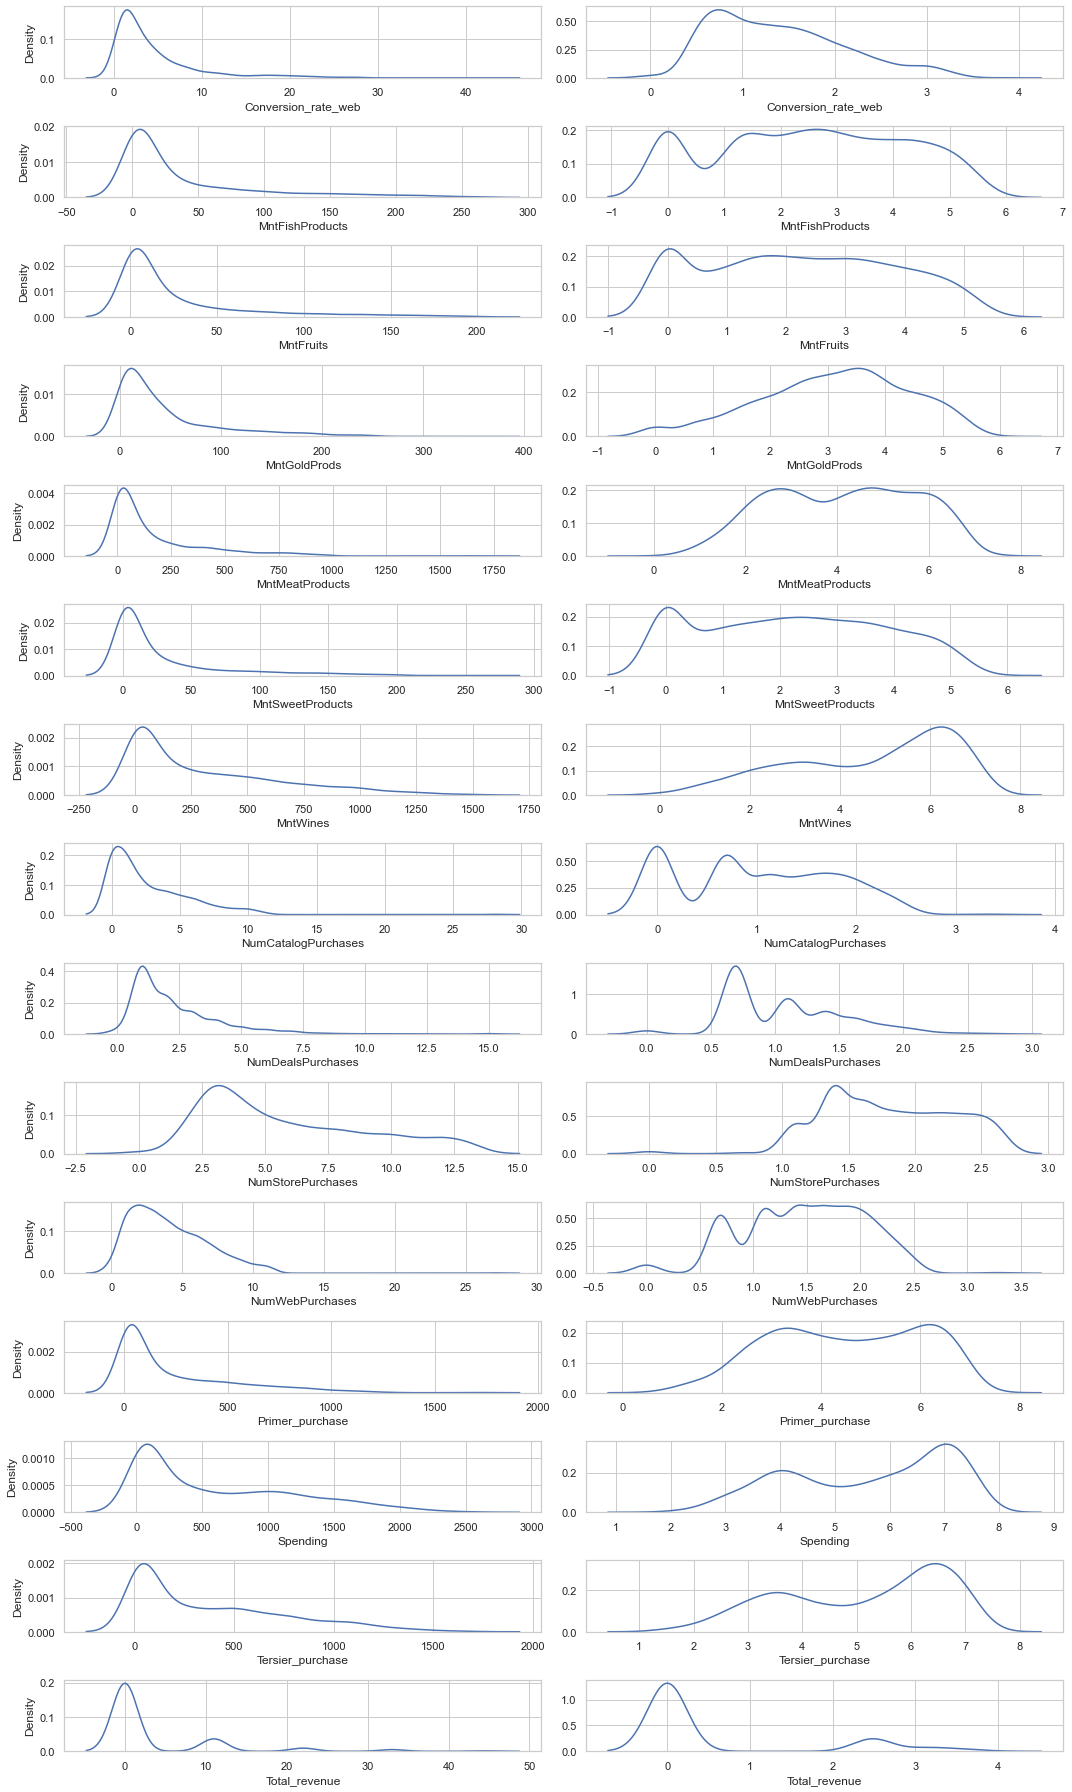

In [77]:
from scipy.stats import boxcox
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [78]:
# for i in log_cols:
#     df[i], parameters = boxcox(df[i]+1)

In [79]:
# df[log_cols].describe()

- **with Sklearn**

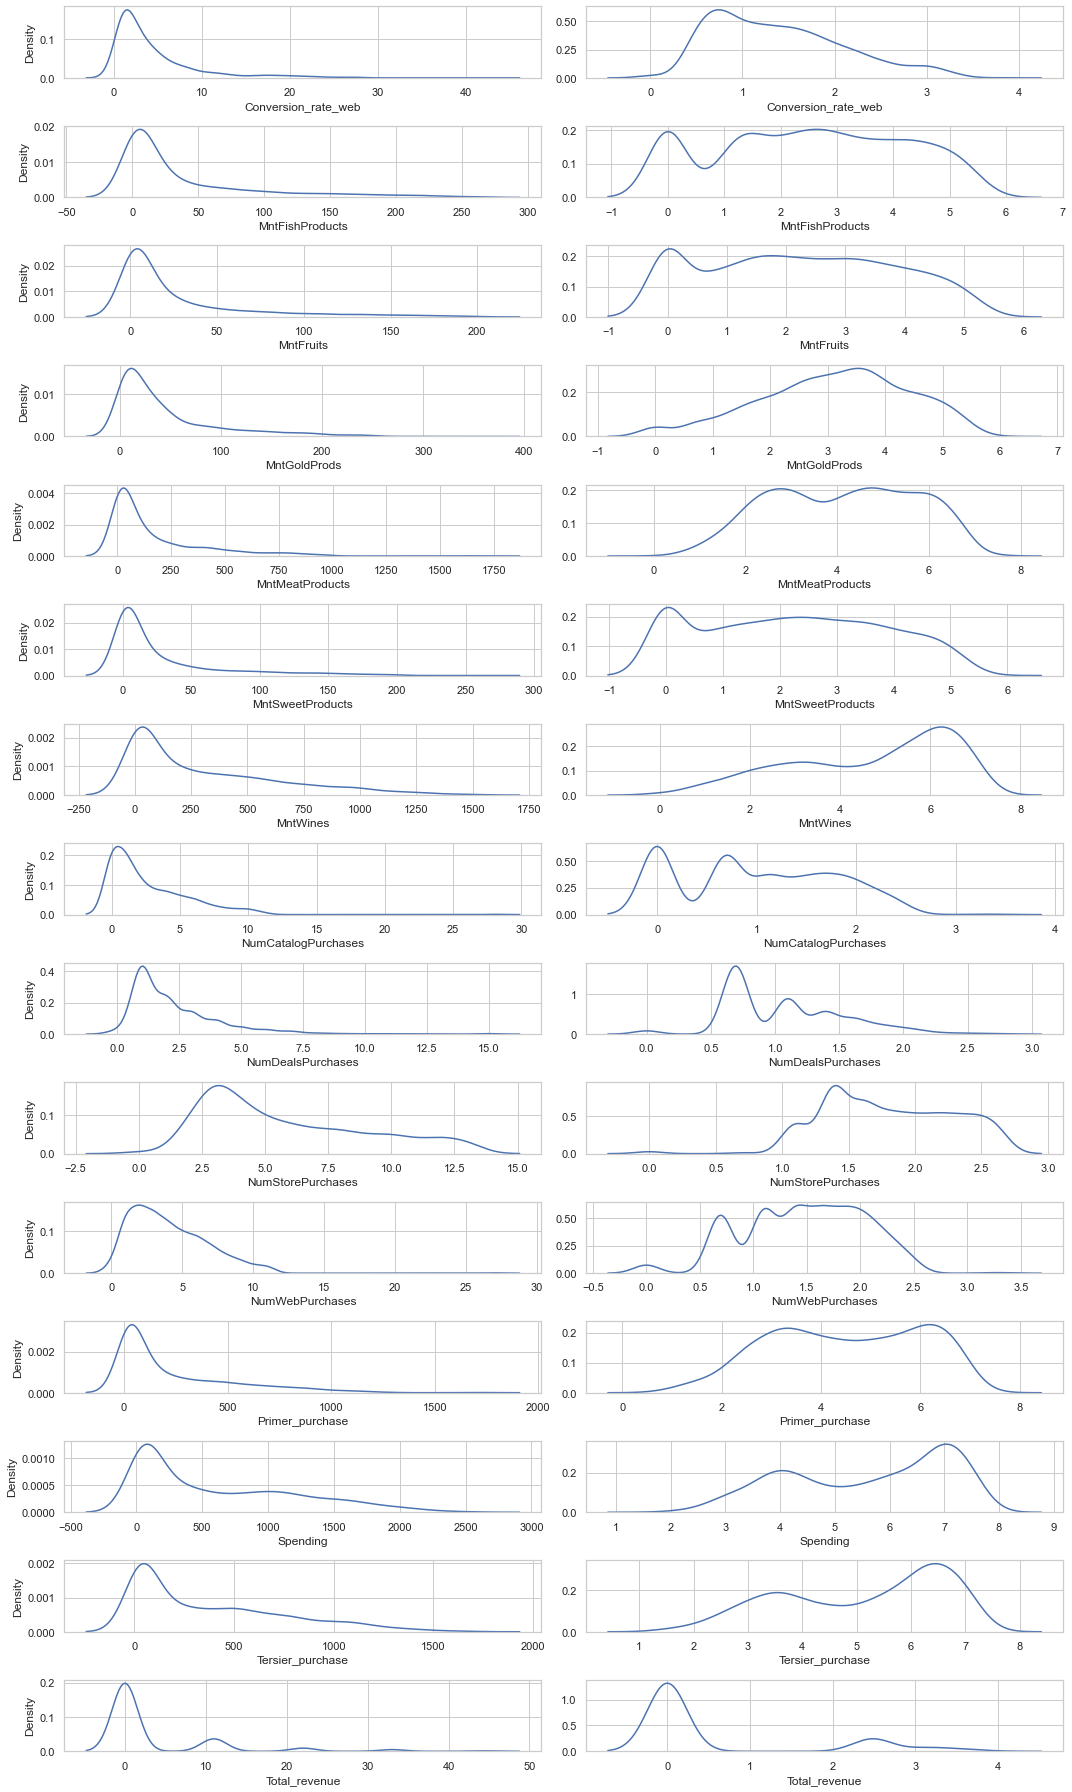

In [80]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='box-cox')
    data = pt.fit_transform(df[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [81]:
# pt = PowerTransformer(method='box-cox')
# df[log_cols] = pt.fit_transform(df[log_cols]+1)

In [82]:
# df[log_cols].describe()

Fit awal sudah fit ke data test juga, karena belum di split

### **Yeo-Johnson Transformation**

Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive.

It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

- **with scipy**

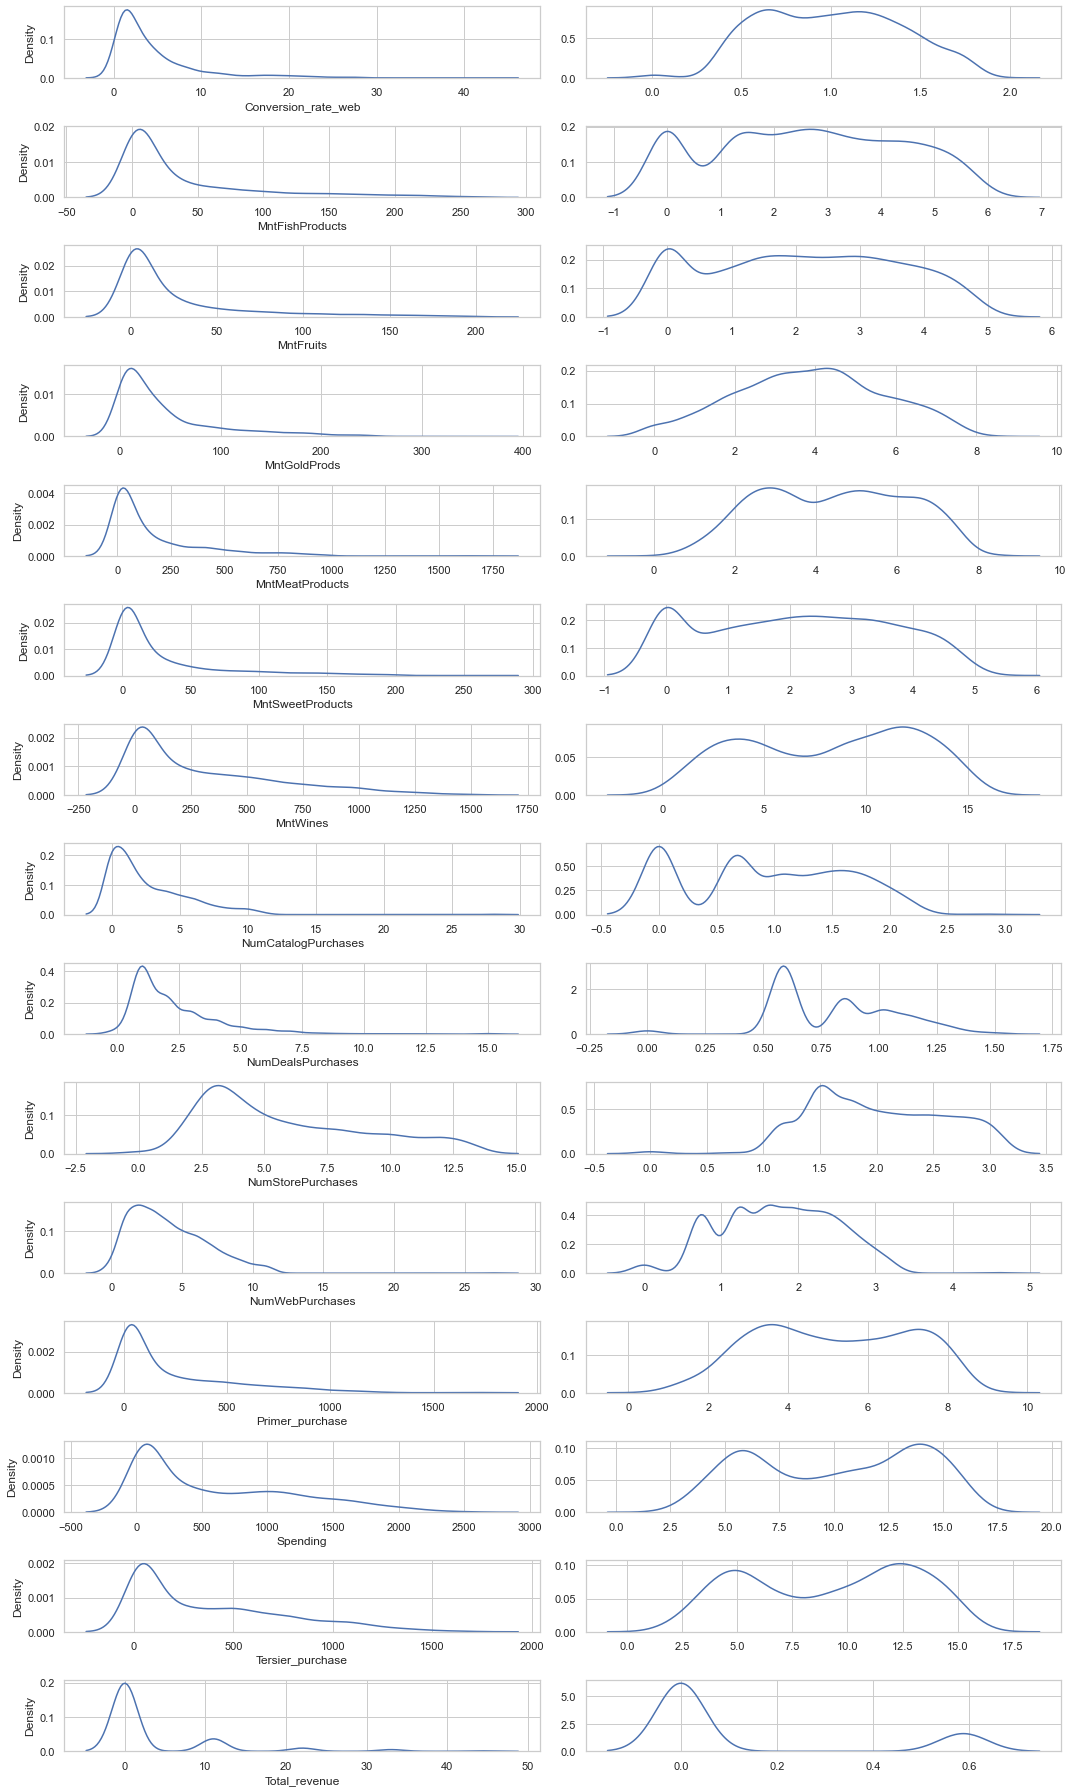

In [83]:
from scipy.stats import yeojohnson

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    data, fitted_lambda = yeojohnson(df[log_cols[i]],lmbda=None)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [84]:
# for i in log_cols:
#     df[i], fitted_lambda = yeojohnson(df[i], lmbda=None)

In [85]:
# df[log_cols].describe()

- **with sklearn**

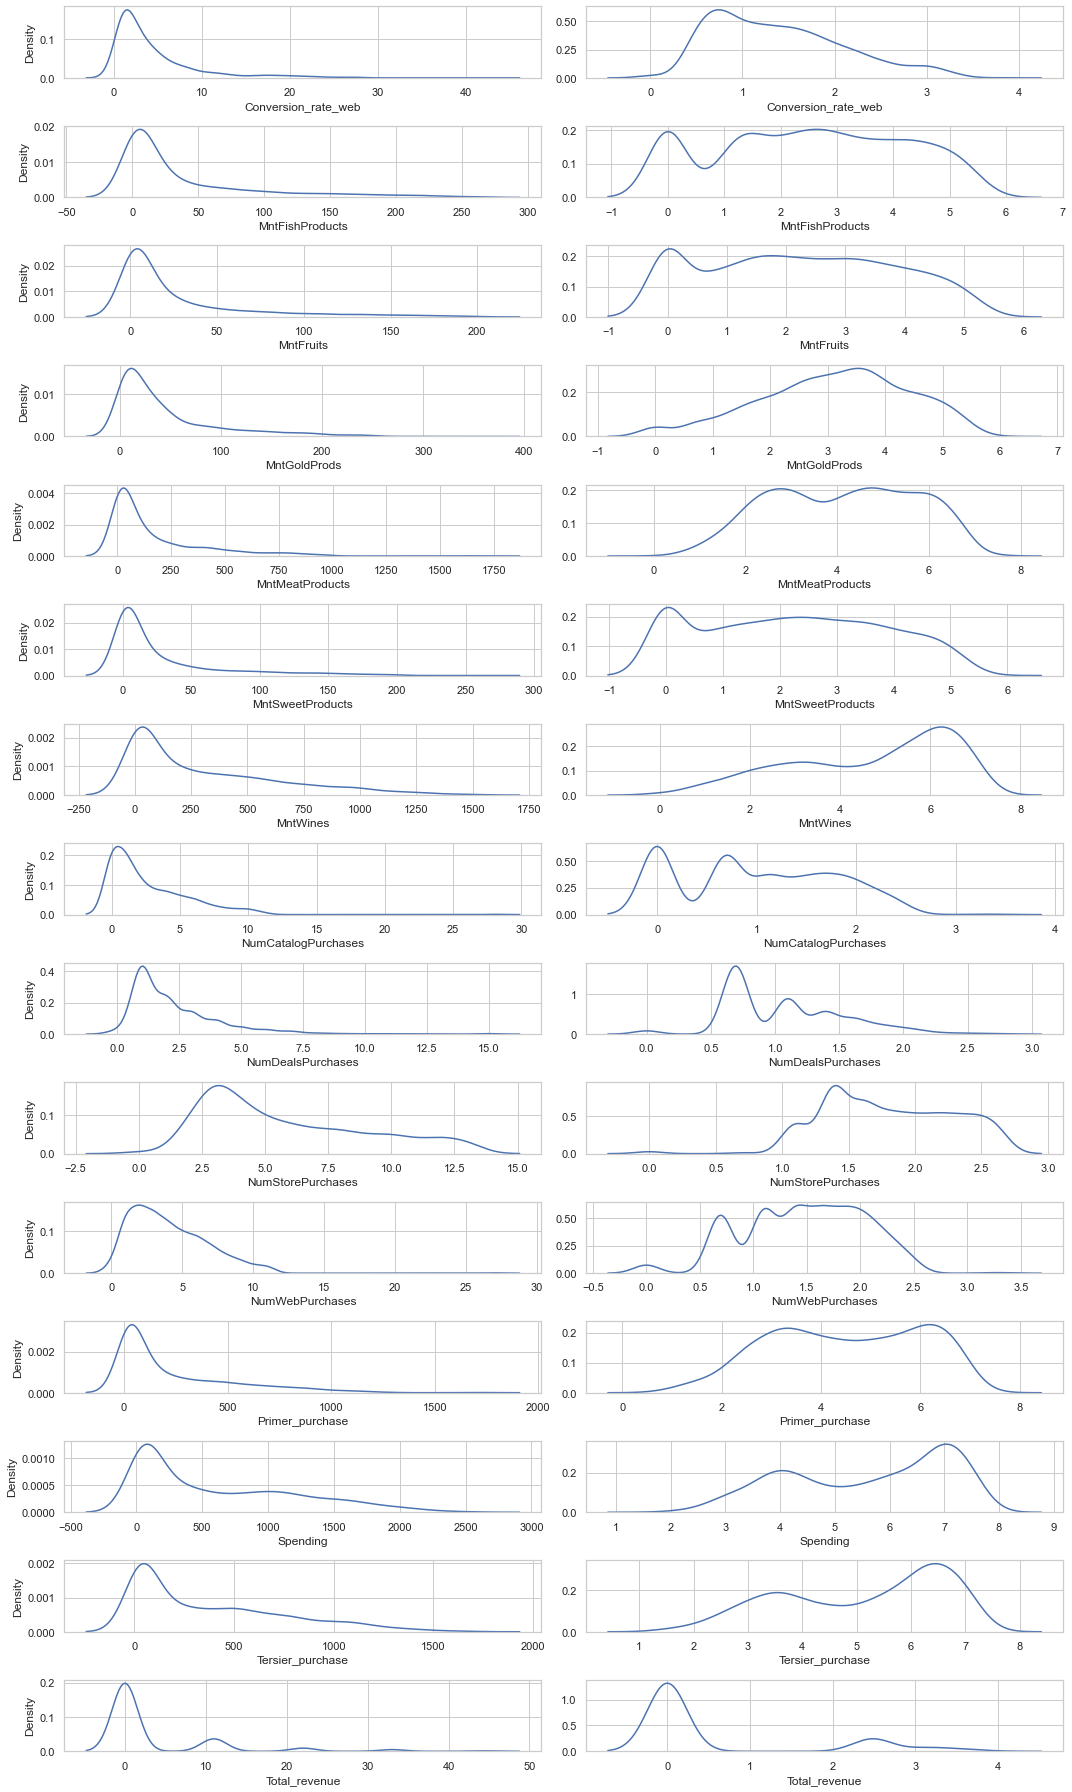

In [86]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='yeo-johnson')
    data = pt.fit_transform(df[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [87]:
pt = PowerTransformer(method='yeo-johnson')
df[log_cols] = pt.fit_transform(df[log_cols])

In [88]:
df[log_cols].describe()

,Conversion_rate_web,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,Primer_purchase,Spending,Tersier_purchase,Total_revenue
count,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03
mean,2.849043e-16,1.916575e-17,-2.087875e-16,-6.982960e-17,-1.505237e-17,3.317263e-16,5.672763e-17,-1.589118e-16,-3.905145e-16,-2.907632e-16,1.784996e-16,-8.753682e-17,2.462997e-16,-9.158347e-17,-2.389264e-16
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-2.602504e+00,-1.509682e+00,-1.454849e+00,-2.138575e+00,-2.511714e+00,-1.434003e+00,-1.970872e+00,-1.338023e+00,-3.011224e+00,-3.392032e+00,-2.362005e+00,-2.314924e+00,-2.069143e+00,-1.976478e+00,-5.103128e-01
25%,-8.424338e-01,-7.007989e-01,-9.853113e-01,-6.882051e-01,-8.385940e-01,-9.711568e-01,-9.104855e-01,-1.338023e+00,-8.201550e-01,-8.627790e-01,-7.093807e-01,-8.349123e-01,-9.800995e-01,-9.755613e-01,-5.103128e-01
50%,-2.079832e-02,3.254224e-03,-1.431804e-03,3.731807e-03,3.471239e-02,-1.681003e-03,1.261694e-01,1.589299e-01,1.581372e-01,-4.692181e-02,1.851832e-01,-3.838851e-02,1.312892e-01,1.334070e-01,-5.103128e-01
75%,7.479659e-01,8.389835e-01,8.296137e-01,6.910780e-01,8.423659e-01,8.167801e-01,8.746546e-01,7.999743e-01,7.441576e-01,8.062471e-01,8.238423e-01,8.913990e-01,9.161492e-01,8.693208e-01,-5.103128e-01
max,2.363106e+00,1.862577e+00,1.884177e+00,2.492608e+00,2.222716e+00,2.012128e+00,1.812958e+00,2.767807e+00,2.658365e+00,1.780425e+00,3.933317e+00,2.046915e+00,1.757460e+00,1.840735e+00,1.985443e+00


### **Normalization**

In [89]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df[norm_cols] = pd.DataFrame(scaler.fit_transform(df[norm_cols]), columns=df[norm_cols].columns)

In [90]:
df[norm_cols].describe()

,Age,Income,Lifetime,Month_joined,NumWebVisitsMonth,Recency,Total_Purchases,Year_Birth
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,0.483964,0.312764,0.489522,0.496910,0.265944,0.496124,0.338012,0.516036
std,0.208987,0.133932,0.306805,0.317167,0.121344,0.292498,0.174497,0.208987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339286,0.209162,0.342857,0.181818,0.150000,0.242424,0.181818,0.339286
50%,0.464286,0.308968,0.485714,0.454545,0.300000,0.494949,0.340909,0.535714
75%,0.660714,0.415382,0.657143,0.818182,0.350000,0.747475,0.477273,0.660714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Standardization**

In [91]:
# from sklearn.preprocessing import StandardScaler

# # create a scaler object
# std_scaler = StandardScaler()
# std_scaler
# # fit and transform the data
# df[norm_cols] = pd.DataFrame(std_scaler.fit_transform(df[norm_cols]), columns=df[norm_cols].columns)

In [92]:
# df[norm_cols].describe()

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan transformation sebelumnya, dapat diketahui bahwa keseluruhan nilai skewnessnya sudah memiliki rentang yang lebih seragam (tidak jauh dan tidak terlalu bervariasi). Sehingga dapat disimpulkan bahwa teknik fitur transformation yang telah kami lakukan sudah valid dan kami.

## **📌 Feature Encoding (Categoric)**

Mengecek feature categorical yang masih memiliki nilai betype string/object

In [93]:
#cek unique value
for x in cat_str: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic']

===== Marital_Status =====
['Single', 'Married', 'Divorced']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_sgmt =====
['Medium', 'High', 'Low']



In [94]:
cat_str

['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']

Dari hasil temuan, kita dapat menentukan beberapa encoding yang akan kita lakukan :
- **Label Encoding :**
    - LabelEncoder
    - Manually Mapped
    
    **Adapun daftar column yang akan kita proses :**
    - `Education` - Basic (0), Graduation (1), Master (2), PhD (3)
    - `Age_group` - Young Adult (0), Adult (1), Senior Adult (2)
    - `Income_sgmt` - Low (0), Medium (1), High (2)
    
- **One Hot Encoding :**
    - get_dummies
    - OneHotEncoder
    
    **Adapun daftar column yang akan kita proses :**
    - `Marital_Status` - Single, Married, Divorced

**Choice Determination:**

- Pada proses `Label Encoding` ini kita menggunakan `Manually Mapped`, karena kita bisa menentukan secara fleksible urutan/order dari categorical feature
- Pada proses `One Hot Encoding` ini kita menggunakan `OneHotEncoder`, karena hasil encodingnya lebih rapi dan lebih mudah untuk dilakukan adjust

### **Label Encoding**

1. Menggunakan `LabelEncoder`

In [95]:
# from sklearn.preprocessing import LabelEncoder

# cat = cat_str.copy()
# cat.remove("Marital_Status")

# le = LabelEncoder()

# for i in cat_str:
#     le.fit(df[i])
#     df[i] = le.transform(df[i])
#     print(le.classes_)

2. Menggunakan Metode `Mapping`

In [96]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

df['Education'] = df['Education'].map(map_edu)
df['Education'].unique()

array([1, 3, 2, 0], dtype=int64)

In [97]:
map_age = {
    'Young Adult' : 0,
    'Adult' : 1,
    'Senior Adult' : 2
}

df['Age_group'] = df['Age_group'].map(map_age)
df['Age_group'].unique()

array([2, 0, 1], dtype=int64)

In [98]:
map_income = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

df['Income_sgmt'] = df['Income_sgmt'].map(map_income)
df['Income_sgmt'].unique()

array([1, 2, 0], dtype=int64)

In [99]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Month_joined,Recency_sgmt,Response
0,5524,0.303571,1,Single,0.351086,0,0,2012-09-04,0.585859,1.058011,1.409686,1.420252,1.603700,1.387832,1.090527,0.744158,1.328316,1.726261,-0.418298,0.35,0,0,0,0,0,0,3,11,0.696429,2,0,0,0.914286,1.315785,1.477134,1.116046,0.568182,0,0,-0.510313,1,0.322257,0.727273,2,1
1,2174,0.250000,1,Single,0.277680,1,1,2014-03-08,0.383838,-1.212159,-0.985311,-1.378336,-0.870349,-0.971157,-0.938568,0.158137,-1.359951,-0.374162,-1.419908,0.25,0,0,0,0,0,0,3,11,0.750000,2,1,2,0.057143,-1.442462,-1.409056,-1.363875,0.136364,0,0,-0.510313,1,-0.859340,0.181818,3,0
2,4141,0.446429,1,Married,0.434956,0,0,2013-08-21,0.262626,0.745578,1.064234,0.445709,1.329530,0.552570,0.448706,-0.820155,1.328316,0.158930,1.242818,0.20,0,0,0,0,0,0,3,11,0.553571,2,0,0,0.542857,0.660253,0.740554,0.671920,0.477273,0,0,-0.510313,2,0.729193,0.636364,3,0
3,6182,0.785714,1,Married,0.155079,1,0,2014-02-10,0.262626,-1.212159,-0.380323,-0.707871,-0.097459,-0.518536,-1.043656,0.158137,-0.709381,-1.338023,-0.418298,0.30,0,0,0,0,0,0,3,11,0.214286,0,1,1,0.028571,-1.118746,-0.650506,-1.340485,0.181818,0,0,-0.510313,0,-0.753151,0.090909,3,0
4,5324,0.732143,3,Married,0.352051,1,0,2014-01-19,0.949495,0.122520,0.986785,0.397927,0.788455,0.699398,-0.342328,1.442609,0.526159,0.524042,0.272951,0.25,0,0,0,0,0,0,3,11,0.267857,1,1,1,0.000000,0.177763,0.515865,0.035887,0.431818,0,0,-0.510313,1,0.389599,0.000000,0,0


### **One Hot Encoding**

1. Menggunakan `get_dummies`

In [100]:
# # Not Auto Drop Columns
# ohe = pd.get_dummies(df["Marital_Status"])
# df.drop("Marital_Status", axis=1, inplace=True)
# df = df.join(ohe)

# # cara 2 : Auto drop Column
# # df = pd.get_dummies(data=df, columns=["Marital_Status"])

# df.head()

2. Menggunakan `OneHotEncoder`

In [101]:
oh.fit_transform(df[["Marital_Status"]])

<2236x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2236 stored elements in Compressed Sparse Row format>

In [102]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe = pd.DataFrame(
    oh.fit_transform(df[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
print(oh.categories_[0])

df.drop("Marital_Status", axis=1, inplace=True)

df = pd.concat([df, df_ohe], axis=1)

['Divorced' 'Married' 'Single']


### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan encoding sebelumnya, dapat diketahui bahwa keseluruhan nilai telah beripe numeric sesuai dengan nilai yang kita assign. Sehingga dapat disimpulkan bahwa teknik fitur encoding yang telah kami lakukan sudah valid dan kami.

## **📌 Feature Selection**

### **1. Drop Unnecessary Feature**

- Drop kolom `ID` karena memiliki banyak kategori dan tidak berguna untuk pemodelan
- Drop kolom `Year_Birth` sudah dilakukan Feature extraction untuk mengambil data Umur/Age pada range tahun saat ini 2014 (sesuai pada data)
- Drop kolom `Dt_Customer` karena tidak terlalu mempengaruhi model prediksi
- Drop kolom `Z_CostContact` (3) dan `Z_Revenue` (11) karena  hanya memiliki satu nilai, tidak memberikan informasi yang signifikan terhadap model prediksi

In [103]:
df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

### **2. Univariate Selection**

In [104]:
# define X and y
X = df.drop(['Response'], axis=1) #features
y = df['Response'] #target

- #### **ANOVA F-value**

`ANOVA F-value` estimates the degree of linearity between the input feature (i.e., independent features) and the output feature (i.e., dependent feature). A high F-value indicates a high degree of linearity and a low F-value indicates a low degree of linearity.

Scikit-learn provides two functions to calculate F-value:

1. `sklearn.feature_selection.f_regression` for regression problems
2. `sklearn.feature_selection.f_classif` for classification problems

Disadvantage:

ANOVA F-value only captures the linear relationships between input and output feature.

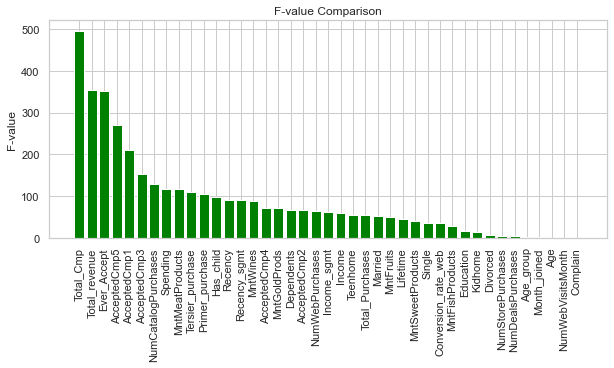

In [105]:
from sklearn.feature_selection import f_classif
feature_names = X.columns

# create f_classif object
f_value = f_classif(X, y)

# print the name and F-value of each feature
# for feature in zip(feature_names, f_value[0]):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "f_value":f_value[0]
}).sort_values("f_value", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="f_value", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.show()

Mengambil 20 top feature

In [106]:
feature_importance = []
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases']

- #### **Variance Threshold**

Variance Threshold removes the features whose variance is below the pre-defined `threshold` value. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

Advantage:

This can be used for unsupervised learning.

Disadvantage:

Variance Threshold only considers the relationship among the features but not the relationship between input features with the output feature.

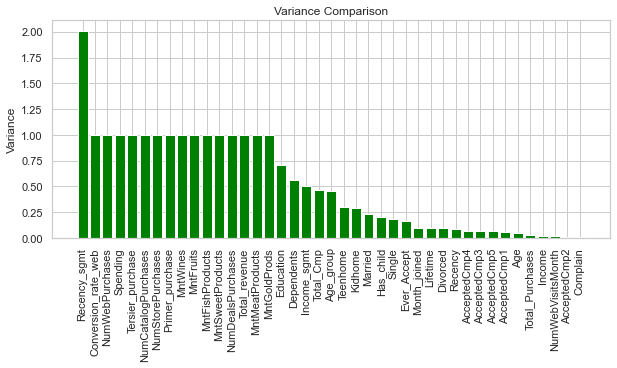

In [107]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
# create VarianceThreshold object
selector = VarianceThreshold(threshold=0.0)
# train and transform
selector.fit_transform(X)
# print the name and variance of each feature
# for feature in zip(feature_names, selector.variances_):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "variances":selector.variances_
}).sort_values("variances", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="variances", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.show()

Mengambil 20 top feature

In [108]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt']

- #### **Mutual information**

Mutual information (MI) measures the dependence of one variable to another by quantifying the amount of information obtained about one feature, through the other feature. MI is symmetric and non-negative and is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Scikit-learn provides two functions to calculate F-value:

- `sklearn.feature_selection.mutual_info_regression` for regression problems
- `sklearn.feature_selection.mutual_info_classif` for classification problems

Advantage:

MI can capture non-linear relationships between input and output feature.

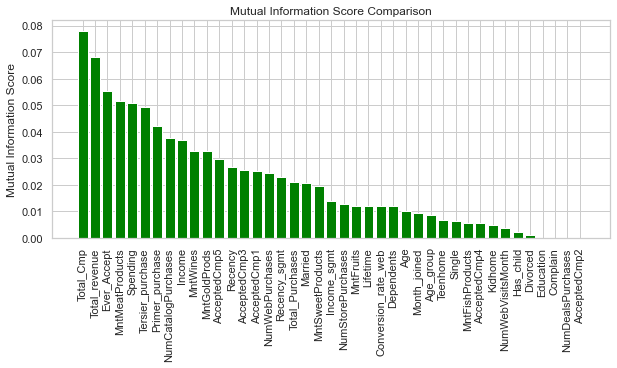

In [109]:
# import mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
# create mutual_info_classif object
MI_score = mutual_info_classif(X, y, random_state=0)
# Print the name and mutual information score of each feature
# for feature in zip(feature_names, MI_score):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "MI_score":MI_score
}).sort_values("MI_score", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="MI_score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.show()

Mengambil 20 top feature

In [110]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt',
 'Income',
 'Total_Purchases',
 'Married']

- #### **Scikit-learn’s SelectKBest**

SelectKBest selects the features using a function (in this case ANOVA F-value) and then "removes all but the k highest scoring features".

Statistical tests can be used to select those features that have the strongest relationship with the output variable. `Mutual information, ANOVA F-test and chi square` are some of the most popular methods of univariate feature selection.

---

ERROR :

`Input X must be non-negative`

The error message you got that:

Tells that: Pearson's chi-square test (goodness of fit) does not apply to negative values. It occurred because the chi-square test assumes frequencies distribution and a frequency can't be a negative number. But, `sklearn.feature_selection.chi2` asserts the input as non-negative.

If data transformation is for some reason not possible (e.g. a negative value is an important factor), then you should pick another statistic to score your features:

```
sklearn.feature_selection.f_classif computes ANOVA f-value
sklearn.feature_selection.mutual_info_classif
```

In [111]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, f_classif, mutual_info_classif

# apply SelectKBest class to extract top 10 best features

# computes chi2
# semuanya harus positif
# bestfeatures = SelectKBest(score_func=chi2, k=10)

# computes ANOVA f-value
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values('Score', ascending=False, inplace=True)
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs       Score
31            Total_Cmp  495.889239
33        Total_revenue  354.134798
32          Ever_Accept  351.524183
18         AcceptedCmp5  269.590003
19         AcceptedCmp1  211.130800
16         AcceptedCmp3  154.206347
13  NumCatalogPurchases  129.077831
27             Spending  117.971705
7       MntMeatProducts  117.687083
29     Tersier_purchase  108.789997


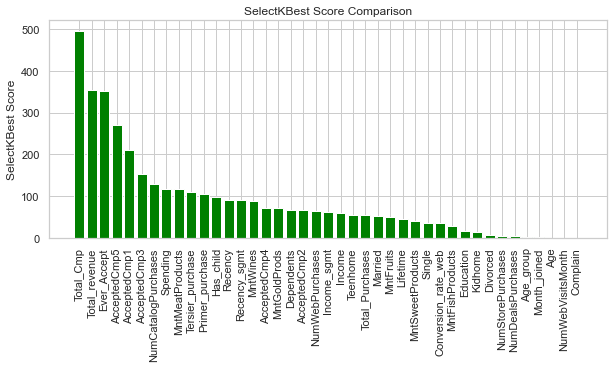

In [112]:
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=featureScores, x="Specs", height="Score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("SelectKBest Score")
plt.title("SelectKBest Score Comparison")
plt.show()

Mengambil 20 top feature

In [113]:
for i in featureScores["Specs"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt',
 'Income',
 'Total_Purchases',
 'Married']

### **3. Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.02562197 0.02790519 0.01000053 0.01344257 0.0459572  0.02671308
 0.0252246  0.03038509 0.02393838 0.02739264 0.02816388 0.02201681
 0.02405954 0.03055543 0.02895739 0.03124521 0.01834671 0.00933162
 0.03261411 0.02136097 0.0041651  0.00106694 0.02603585 0.01754084
 0.01418654 0.01461419 0.03793363 0.02776379 0.0264262  0.0246316
 0.0235545  0.034688   0.03690674 0.04766014 0.01188103 0.02528987
 0.02420639 0.04514282 0.01041506 0.02764624 0.01501159]


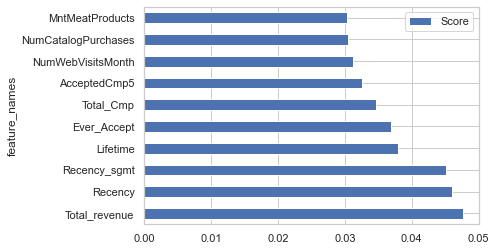

In [114]:
from sklearn.ensemble import ExtraTreesClassifier

# define X and y
X = df.drop('Response', axis=1)  # features
y = df['Response']  # target

model = ExtraTreesClassifier()
model.fit(X, y)

print(model.feature_importances_)  # use inbuilt class feature_importances of tree-based classifiers

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.reset_index().rename(columns={0: 'Score', 'index': 'feature_names'})
feat_importances = feat_importances.sort_values('Score', ascending=False).reset_index(drop=True)
top_10_features = feat_importances.nlargest(10, 'Score')

top_10_features.plot(x='feature_names', y='Score', kind='barh')
plt.show()

Mengambil 20 top feature

In [115]:
for i in feat_importances["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt',
 'Income',
 'Total_Purchases',
 'Married',
 'Lifetime',
 'NumWebVisitsMonth',
 'Age']

### **4. Correlation Matrix with Heatmap**

- Correlation states how the features are related to each other or the target variable.

- Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

- Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

- Cek Feature Redundan pada korelasi Antar Feature, Drop salah satunya, yang rendah korelsinya dengan Response (target)

<AxesSubplot:>

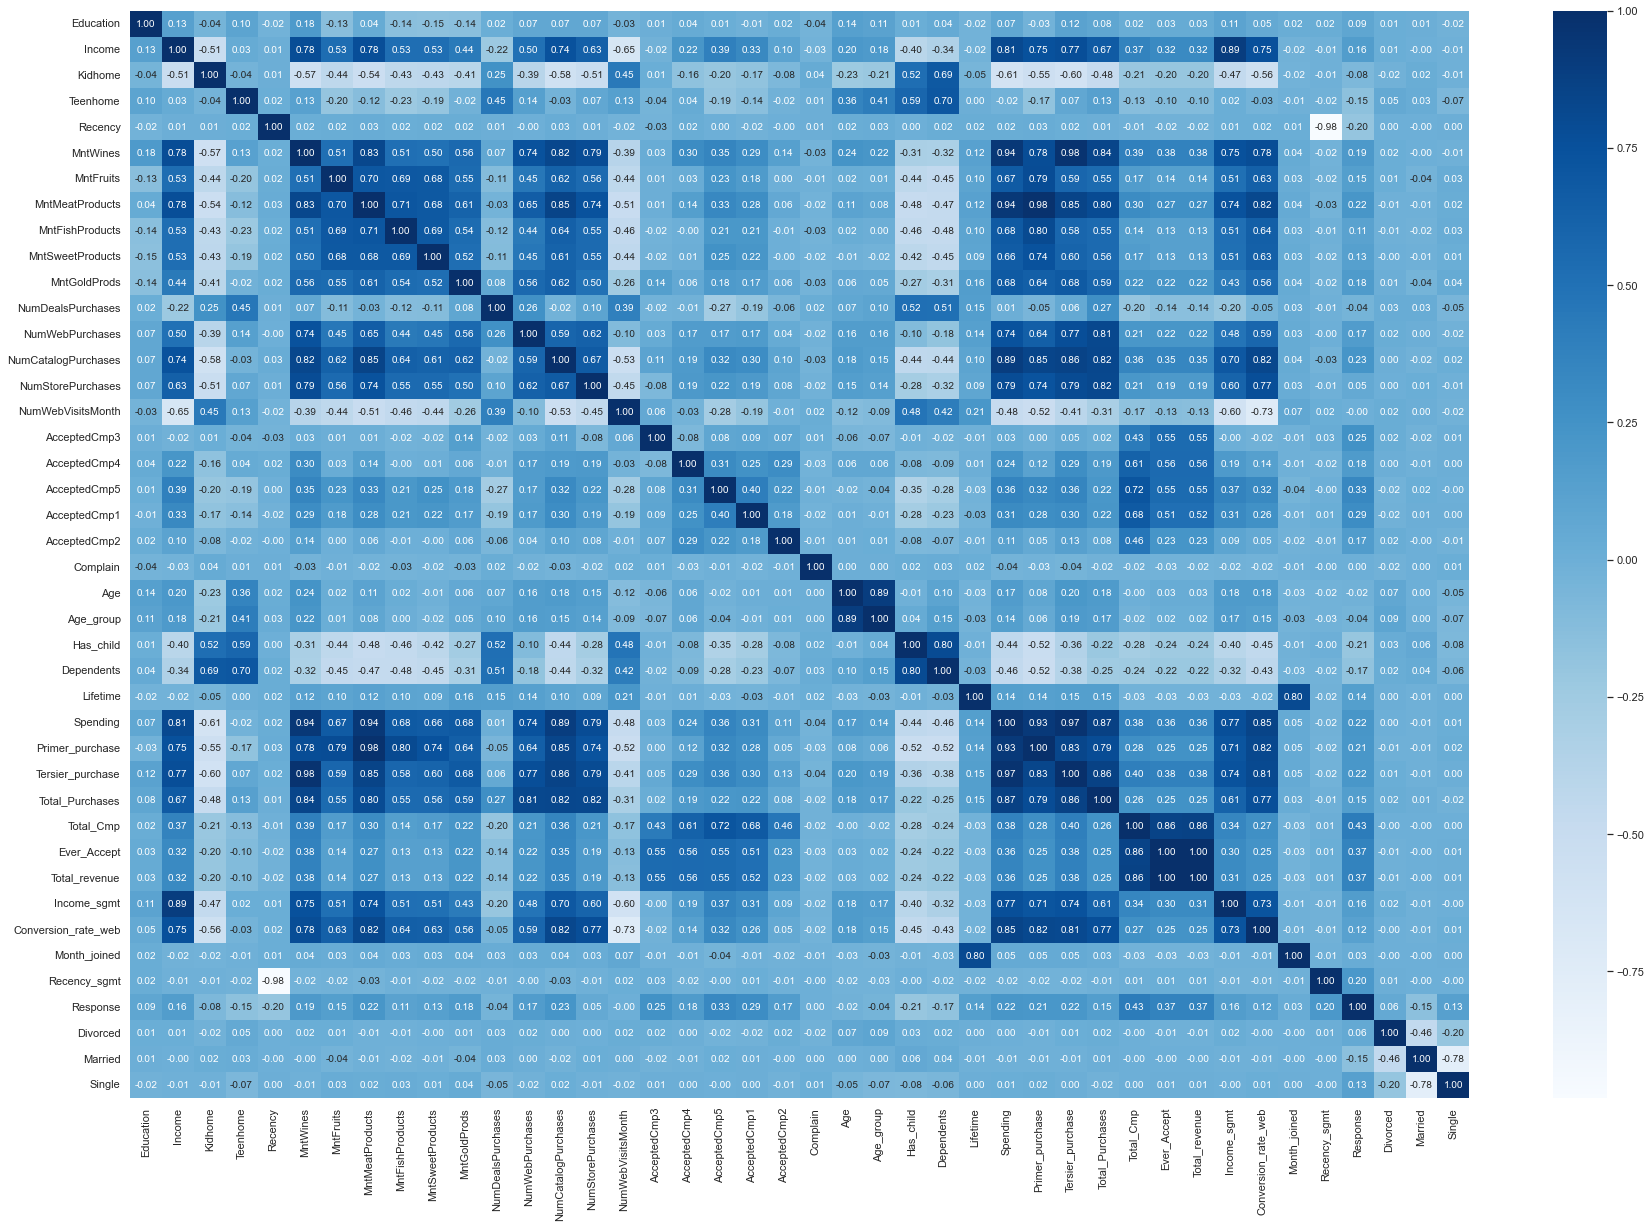

In [116]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Checking Correlation with Target (Response)**

In [117]:
corr = df.corrwith(df["Response"])
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr.head(10)

,index,corr value,Corr Type
0,Response,1.000000,Positif
1,Total_Cmp,0.426206,Positif
2,Total_revenue,0.369906,Positif
3,Ever_Accept,0.368726,Positif
4,AcceptedCmp5,0.328148,Positif
5,AcceptedCmp1,0.293849,Positif
6,AcceptedCmp3,0.254106,Positif
7,NumCatalogPurchases,0.233715,Positif
8,Spending,0.223961,Positif
9,MntMeatProducts,0.223704,Positif


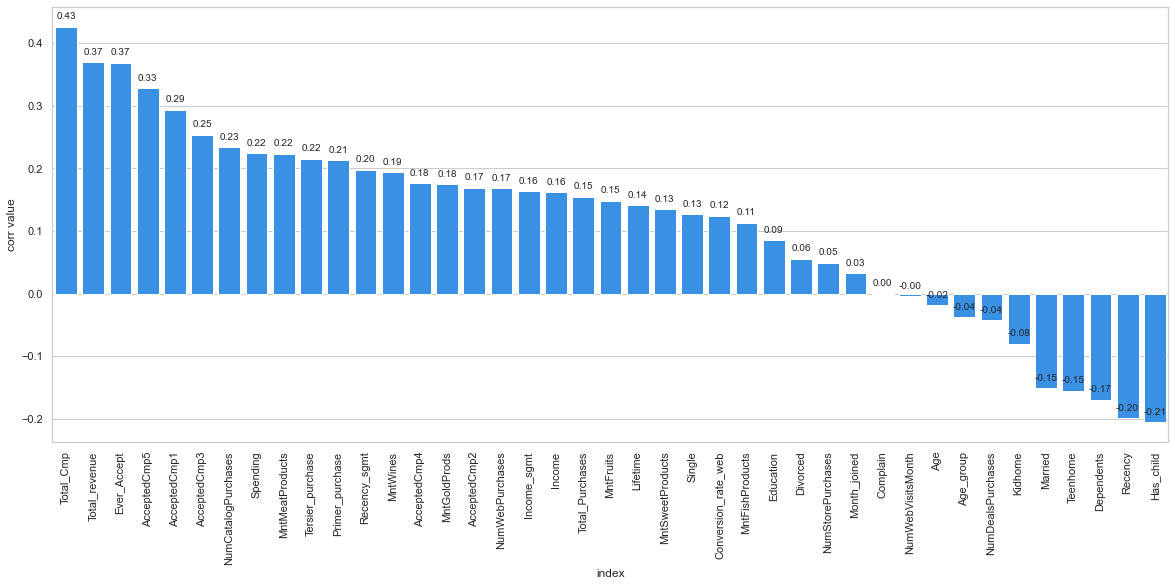

In [118]:
corr = df.corrwith(df["Response"])
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [119]:
target = "Response"
high_corr_cols = [i for i in list(corr[corr["corr value"] > 0.15]["index"].values) if i != target]
print(high_corr_cols)

['Total_Cmp', 'Total_revenue', 'Ever_Accept', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp3', 'NumCatalogPurchases', 'Spending', 'MntMeatProducts', 'Tersier_purchase', 'Primer_purchase', 'Recency_sgmt', 'MntWines', 'AcceptedCmp4', 'MntGoldProds', 'AcceptedCmp2', 'NumWebPurchases', 'Income_sgmt', 'Income', 'Total_Purchases']


Mengambil 20 top feature

In [120]:
for i in corr["index"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt',
 'Income',
 'Total_Purchases',
 'Married',
 'Lifetime',
 'NumWebVisitsMonth',
 'Age']

### **5. Check Data Redundancy**

Dari feature yang telah kita pilih dari gabungan Top 20 akan di lakukan pengecekan kembali melalui `redudansi antar feature`. Pada proses ini kita memilih antar feature yang memiliki korelasi diatas `threshold > 0.70`, yang kemudian akan di `bandingkan korelasinya dengan Target` untuk `drop salah satu feature`

<AxesSubplot:>

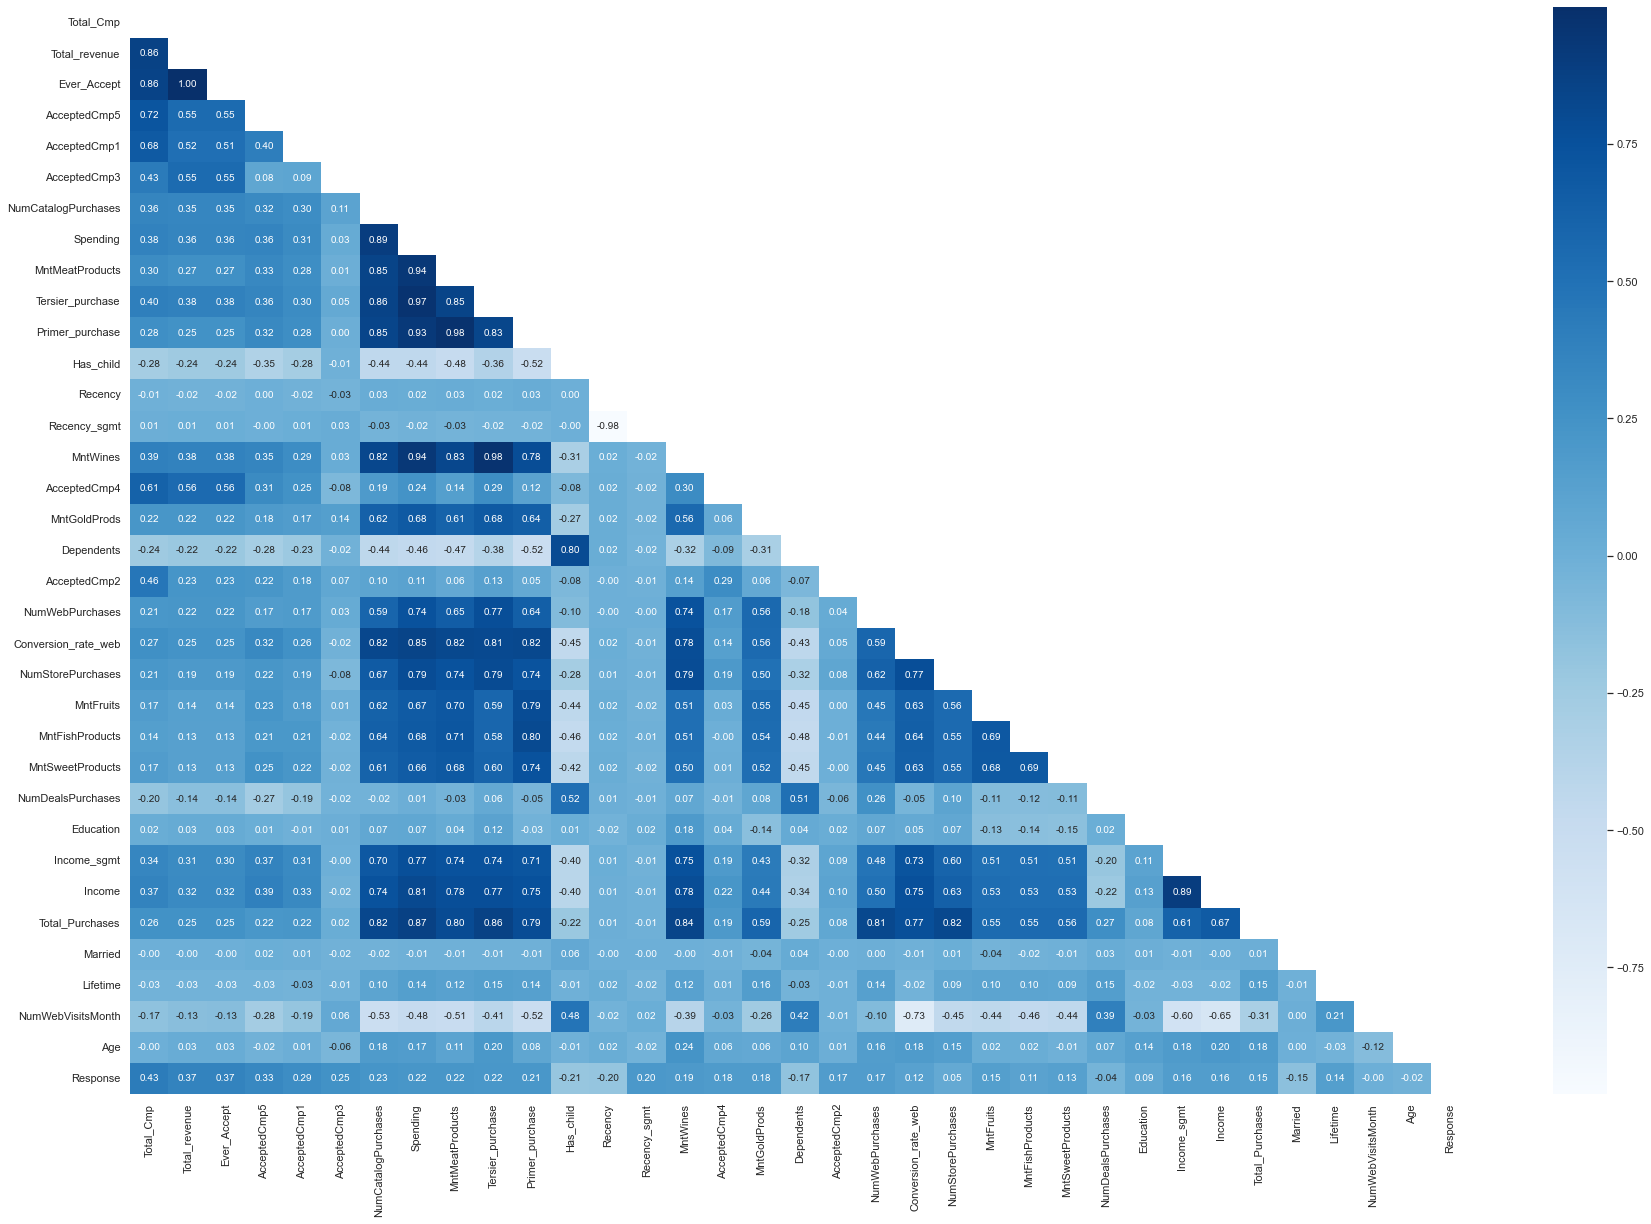

In [121]:
plt.figure(figsize=(30,20))
corr = df[feature_importance+["Response"]].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Manampilkan Korelasi Feature > Threshold 0.70**

Akan ada info mengenai Feature apa saja yang perlu di drop

In [122]:
def corrtarget(x):
    target = "Response"
    return df[x].corr(df[target])

def corrresp(x):
    target = "Response"
    col1 = x["A"]
    col2 = x["B"]
    
    cor1 = df[col1].corr(df[target])
    cor2 = df[col2].corr(df[target])
    
    if cor1 < cor2:
        return col1
    else:
        return col2
    return col1

In [123]:
corr_matrix = df[feature_importance].corr()
target = "Response"

# Flatten correlation matrix.
flat_cm = corr_matrix.stack().reset_index()
flat_cm.columns = ['A', 'B', 'correlation']    
flat_cm = flat_cm.loc[flat_cm.correlation < 1, :]
flat_cm = flat_cm.sort_values("correlation", ascending=False)
redundan = flat_cm[flat_cm["correlation"] >= 0.7].reset_index(drop=True)
redundan['A vs Target'] = redundan['A'].apply(lambda x: corrtarget(x))
redundan['B vs Target'] = redundan['B'].apply(lambda x: corrtarget(x))
redundan = redundan.drop_duplicates(subset=["correlation"])
redundan["drop"] = redundan.apply(corrresp, axis=1)
redundan

,A,B,correlation,A vs Target,B vs Target,drop
0,Ever_Accept,Total_revenue,0.999982,0.368726,0.369906,Ever_Accept
2,MntMeatProducts,Primer_purchase,0.977667,0.223704,0.212989,Primer_purchase
4,MntWines,Tersier_purchase,0.976146,0.193849,0.215490,MntWines
6,Tersier_purchase,Spending,0.970442,0.215490,0.223961,Tersier_purchase
8,MntMeatProducts,Spending,0.937875,0.223704,0.223961,MntMeatProducts
10,MntWines,Spending,0.937196,0.193849,0.223961,MntWines
12,Spending,Primer_purchase,0.929771,0.223961,0.212989,Primer_purchase
14,Spending,NumCatalogPurchases,0.894305,0.223961,0.233715,Spending
16,Income,Income_sgmt,0.892218,0.161643,0.163239,Income
18,Spending,Total_Purchases,0.873134,0.223961,0.154715,Total_Purchases


**Drop Redundant Features**

In [124]:
for i in list(redundan["drop"].unique()):
    feature_importance.remove(i)
    
feature_importance = sorted(feature_importance)
feature_importance

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'Age',
 'Dependents',
 'Education',
 'Lifetime',
 'Married',
 'MntGoldProds',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'Recency',
 'Recency_sgmt',
 'Total_Cmp']

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan feature selection :
- Drop Unnecessary Feature
- Univariate Selection
    - Anova F-value
    - Variance Threshold
    - Mutual Information
    - SelectKBest
- Feature Importance
- Pearson Correlation
- Drop Redundace

Maka telah didapatkan feature yang akan digunakan pada proses modelling sebagai berikut :

In [125]:
df[feature_importance].head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,Age,Dependents,Education,Lifetime,Married,MntGoldProds,NumCatalogPurchases,NumDealsPurchases,NumWebVisitsMonth,Recency,Recency_sgmt,Total_Cmp
0,0,0,0,0,0.696429,0,1,0.914286,0.0,1.090527,1.726261,0.744158,0.35,0.585859,2,0
1,0,0,0,0,0.750000,2,1,0.057143,0.0,-0.938568,-0.374162,0.158137,0.25,0.383838,3,0
2,0,0,0,0,0.553571,0,1,0.542857,1.0,0.448706,0.158930,-0.820155,0.20,0.262626,3,0
3,0,0,0,0,0.214286,1,1,0.028571,1.0,-1.043656,-1.338023,0.158137,0.30,0.262626,3,0
4,0,0,0,0,0.267857,1,3,0.000000,1.0,-0.342328,0.524042,1.442609,0.25,0.949495,0,0


## **📌 Data Splitting**

I will split the data into training set and testing set with proportion of 75:25.

In [126]:
# define X and y
X = df.drop(['Response'], axis=1)[feature_importance] #features
y = df['Response'] #target

In [127]:
from sklearn.model_selection import train_test_split

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify= y, random_state=42)
print(X_train.shape, X_test.shape)

(1677, 16) (559, 16)


## **📌 Handling Imbalanced Data**

Status risiko highly imbalanced, dengan 15% Response dan 85% No Response. Itu sebabnya diperlukan resampling.

**Note**: Saat menerapkan  machine learning algorithms dengan data yang tidak seimbang, model yang diperoleh akan lebih condong ke kelas mayoritas. Artinya model akan memprediksi kelas mayoritas bukan kelas minoritas.

Jika kita ingin melakukan klasifikasi, maka seharusnya melakukan `stratified train_test_split` terlebih dahulu untuk menjaga ketidakseimbangannya (imbalance). Sehingga dataset test dan train memiliki distribusi yang sama, kemudian jangan pernah menyentuh test set lagi. Kemudian lakukan pengambilan sampel ulang hanya pada data train.

**Summary** : You must apply `SMOTE` after splitting into `training and test`, not before. Doing SMOTE before is bogus and defeats the purpose of having a separate test set.

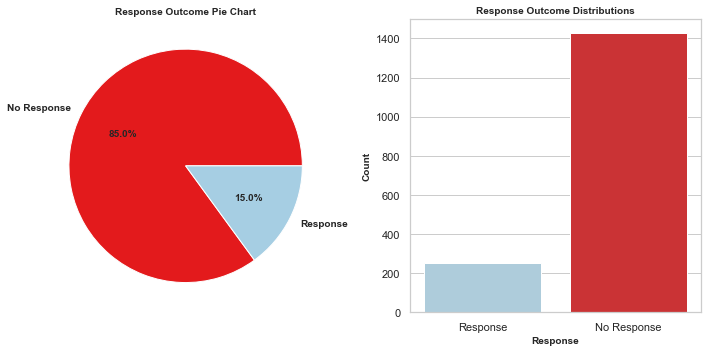

In [128]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.pie(y_train.value_counts(),
        labels = ['No Response', 'Response'], 
        autopct = '%.1f%%', 
        radius = 1, 
        colors=["#e31a1c", "#a6cee3"],
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Response Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = y_train.apply(lambda x: "No Response" if x == 0 else "Response")
t = sns.countplot(x=resp, palette=["#a6cee3", "#e31a1c"])
t.set_xlabel('Response', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Response Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

In [129]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [130]:
import imblearn

In [131]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # Response
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # No Response

# Undersampling
# us = RandomUnderSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = us.fit_resample(X_train,y_train)

# Oversampling
# os = RandomOverSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = os.fit_resample(X_train,y_train)

# Oversampling SMOTE
sm = SMOTE(sampling_strategy=0.5, random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_balanced_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

X_train = X_balanced_res
y_train = y_balanced_res

Before OverSampling, the shape of X_train: (1677, 16)
Before OverSampling, the shape of y_train: (1677,) 

Before OverSampling, counts of label '1': 251
Before OverSampling, counts of label '0': 1426 

After OverSampling, the shape of X_train: (2139, 16)
After OverSampling, the shape of y_train: (2139,) 

After OverSampling, counts of label '1': 713
After OverSampling, counts of label '0': 1426


# **====== STAGE 3 ======**
`Stage 3 (ML Modelling & Evaluation)`

# **🏝 ML Modelling and Evaluation 🏝**

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [133]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [134]:
df.Response.value_counts(normalize=True)

0    0.850626
1    0.149374
Name: Response, dtype: float64

## **📌 Logistic Regression**

Metode ini digunakan untuk memodelkan hubungan antara variabel independen dan variabel dependen biner atau multi-kategori. Regresi logistik menghasilkan probabilitas kelas sebagai output.

### **Fit Model**

In [135]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.52
Recall (Test Set): 0.65
F1-Score (Test Set): 0.58
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.87
roc_auc (crossval train): 0.999735883412271
roc_auc (crossval test): 0.8727980680805244


**Observation:** 
- Precision dan Recall memiliki gap cukup besar dengan jarak 13 poin
- AUC train < AUC test dengan gap 1 poin
- crossval train > crossval test dengan gap 12 poin

### **Hyperparameter Tuning**

In [136]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.52
Recall (Test Set): 0.65
F1-Score (Test Set): 0.58
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.87
roc_auc (crossval train): 0.9997418013104129
roc_auc (crossval test): 0.8801889212091722


**Observation:** 
Setelah dilakukan hyperparameter tuning:
- Gap Precision dan Recall tidak berkurang tetap di angka 13
- AUC train < AUC test dengan gap 1 poin
- crossval train > crossval test dengan gap 12 poin

### **Learning Curve**

param value: 0.0001; train: 0.7788137160212365; test: 0.8374126759137389
param value: 0.010199999999999999; train: 0.8278735524786129; test: 0.8806191151159258
param value: 0.0203; train: 0.8386177166585688; test: 0.8857573149741824
param value: 0.0304; train: 0.8438521034917551; test: 0.8859091829502885
param value: 0.0405; train: 0.8470574523623589; test: 0.8860863622557457
param value: 0.0506; train: 0.8493156545737448; test: 0.8859598056089906
param value: 0.060700000000000004; train: 0.8510427465089334; test: 0.8859091829502884
param value: 0.0708; train: 0.8523646209741349; test: 0.8857320036448314
param value: 0.0809; train: 0.8536156807358435; test: 0.8857320036448313
param value: 0.091; train: 0.8545136505176358; test: 0.8855548243393743
param value: 0.1011; train: 0.8552158963272741; test: 0.8855548243393743
param value: 0.1112; train: 0.8558709323345837; test: 0.8852763997165131
param value: 0.1213; train: 0.8564541701008519; test: 0.8852004657284601
param value: 0.1314; tra

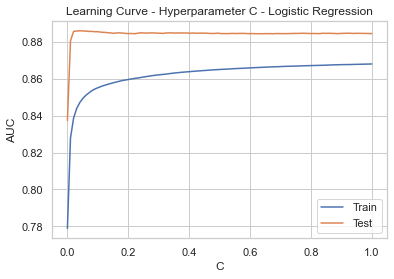

In [138]:
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 1, 100)]
draw_learning_curve(param_values)

## **📌 k-Nearest Neighbor (KNN)**

Memprediksi label data berdasarkan kelas mayoritas dari K tetangga terdekat dalam ruang fitur. K adalah parameter yang menentukan jumlah tetangga yang akan digunakan dalam klasifikasi.

### **Fit Model**

In [139]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.40
Recall (Test Set): 0.58
F1-Score (Test Set): 0.48
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.9997629404123884
roc_auc (crossval test): 0.8748390999079124


**Observation:** 
- Precision dan Recall memiliki gap cukup besar dengan jarak 18 poin
- AUC train > AUC test dengan gap 18 poin
- crossval train > crossval test dengan gap 12 poin

### **Hyperparameter Tuning**

In [140]:
from sklearn.model_selection import RandomizedSearchCV

leaf_size = list(range(1,100))
n_neighbors = list(range(1,100))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.51
Recall (Test Set): 0.63
F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9997511190417511
roc_auc (crossval test): 0.8796078861741226


**Observation:** 
Setelah dilakukan hyperparameter tuning:
- Gap Precision dan Recall `berkurang` menjadi 12 poin
- AUC train < AUC test `bertambah` dengan gap 9 poin
- crossval train > crossval test `tetap` dengan gap 12 poin

### **Learning Curve**

param value: 1; train: 0.9964936886395512; test: 0.7119823833147717
param value: 2; train: 0.9925865857280833; test: 0.7480383719752961
param value: 3; train: 0.9846341928795815; test: 0.7627569099929128
param value: 4; train: 0.9777681172534124; test: 0.7890933481826465
param value: 5; train: 0.9703753572700144; test: 0.7935607978131012
param value: 6; train: 0.9633627345491168; test: 0.802040093145692
param value: 7; train: 0.9565153461363693; test: 0.8081401235192871
param value: 8; train: 0.9532141023547855; test: 0.8116583982990787
param value: 9; train: 0.9476939978637564; test: 0.8219980763389694
param value: 10; train: 0.943935409122114; test: 0.8225549255846918
param value: 11; train: 0.9401227258153034; test: 0.8270603422091728
param value: 12; train: 0.9365888754034963; test: 0.8354257365596841
param value: 13; train: 0.934088231186402; test: 0.8387668320340184
param value: 14; train: 0.931877730546119; test: 0.8446390604434544
param value: 15; train: 0.9289546569519384; tes

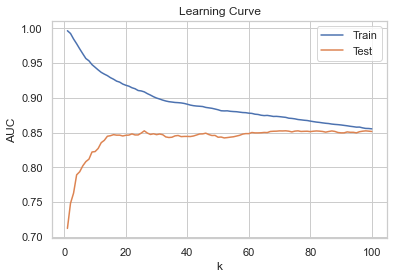

In [141]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

## **📌 Decision Tree**

Decision tree membagi data berdasarkan serangkaian keputusan yang dibuat pada fitur-fitur. Setiap node internal pada pohon keputusan mewakili keputusan berdasarkan fitur-fitur tersebut, sedangkan daun pohon mewakili label atau kelas hasil klasifikasi.

### **Fit Model**

In [142]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.38
Recall (Test Set): 0.51
F1-Score (Test Set): 0.44
roc_auc (test-proba): 0.69
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9997452192879527
roc_auc (crossval test): 0.8831130237121417


**Observation:** 
- Precision dan Recall memiliki gap cukup besar dengan jarak 10 poin
- AUC train > AUC test dengan gap 27 poin
- crossval train > crossval test dengan gap 12 poin

### **Hyperparameter Tuning**

In [143]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.48
Recall (Test Set): 0.48
F1-Score (Test Set): 0.48
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9997703336842367
roc_auc (crossval test): 0.87842071618324


**Observation:** 
Setelah dilakukan hyperparameter tuning:
- Gap Precision dan Recall `berkurang` menjadi 9 poin
- AUC train < AUC test `berkurang` dengan gap 24 poin
- crossval train > crossval test `tetap` dengan gap 12 poin

## **📌 Naive Bayes**

Metode ini didasarkan pada Teorema Bayes dan mengasumsikan independensi fitur. Naive Bayes menghitung probabilitas kelas berdasarkan probabilitas fitur dan mengambil keputusan berdasarkan probabilitas tertinggi.

### **Fit Model**

In [144]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() # inisiasi object dengan nama gnb
gnb.fit(X_train, y_train) # fit model naive bayes dari data train
eval_classification(gnb)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.41
Recall (Test Set): 0.52
F1-Score (Test Set): 0.46
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.80
roc_auc (crossval train): 0.9997402999782702
roc_auc (crossval test): 0.8766046017885556


**Observation:** 
- Precision dan Recall memiliki gap cukup besar dengan jarak 11 poin
- AUC train < AUC test dengan gap 3 poin
- crossval train > crossval test dengan gap 12 poin

## **📌 Random Forest**

Metode ini menggabungkan prediksi dari beberapa decision tree untuk menghasilkan prediksi akhir yang lebih stabil dan akurat.

### **Fit Model**

In [145]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # inisiasi object dengan nama rf
rf.fit(X_train, y_train) # fit model random forest dari data train
eval_classification(rf)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.63
Recall (Test Set): 0.49
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.88
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9997304637639844
roc_auc (crossval test): 0.878019455148625


**Observation:** 
- Precision dan Recall memiliki gap cukup besar dengan jarak 6 poin
- AUC train > AUC test dengan gap 12 poin
- crossval train > crossval test dengan gap 11 poin

### **Hyperparameter Tuning**

In [146]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.58
Recall (Test Set): 0.51
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.999742770820594
roc_auc (crossval test): 0.8766326335270364


**Observation:** 
Setelah dilakukan hyperparameter tuning:
- Gap Precision dan Recall `bertambah` menjadi 15 poin
- AUC train < AUC test `berkurang` dengan gap 10 poin
- crossval train > crossval test `tetap` dengan gap 12 poin

## **📌 Boosting: Adaboost**

is meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

### **Fit Model**

In [147]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.48
Recall (Test Set): 0.55
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.9997683638638879
roc_auc (crossval test): 0.8796569473395559


**Observation:** 
- Precision dan Recall memiliki gap cukup besar dengan jarak 6 poin
- AUC train > AUC test dengan gap 5 poin
- crossval train > crossval test dengan gap 12 poin

### **Hyperparameter Tuning**

In [148]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.55
Recall (Test Set): 0.58
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.9997398216548351
roc_auc (crossval test): 0.8750559235244492


**Observation:** 
Setelah dilakukan hyperparameter tuning:
- Gap Precision dan Recall `berkurang` menjadi 3 poin
- AUC train < AUC test `tetap` dengan gap 5 poin
- crossval train > crossval test `tetap` dengan gap 12 poin

## **📌 Boosting: XGBoost**

### **Fit Model**

In [149]:
#pip install xgboost

In [150]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.64
Recall (Test Set): 0.57
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9997644158102421
roc_auc (crossval test): 0.8793249806050184


**Observation:** 
- Precision dan Recall memiliki gap cukup besar dengan jarak 5 poin
- AUC train > AUC test dengan gap 12 poin
- crossval train > crossval test dengan gap 12 poin

### **Hyperparameter Tuning**

In [151]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.59
Recall (Test Set): 0.53
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9997442341181939
roc_auc (crossval test): 0.8803277184885203


**Observation:** 
Setelah dilakukan hyperparameter tuning:
- Gap Precision dan Recall `bertambah` menjadi 9 poin
- AUC train < AUC test `berkurang` dengan gap 11 poin
- crossval train > crossval test `tetap` dengan gap 12 poin

## **📌 Stacking**

Melakukan kombinasi dari banyak model klasifikasi

### **Choosing the baseline**

In [152]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model, hyperparameters, cv=5, scoring_fit='recall'):
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X_train_data, y_train_data)
    best_model = rs.best_estimator_
    
    pred = rs.predict(X_test_data)
    pred_proba = rs.predict(X_test_data)
    score = roc_auc_score(y_test_data, pred_proba)
    return [best_model, pred, score]

models_to_train = [LogisticRegression(), 
                   KNeighborsClassifier(), 
                   DecisionTreeClassifier(), 
                   RandomForestClassifier(), 
                   AdaBoostClassifier(random_state=42), 
                   XGBClassifier(random_state=42)
                  ]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.linspace(0.0001, 1, 100)]
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,100)),
        'n_neighbors': list(range(1,100)),
        'p': [1,2,3],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,X_train.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X_train, X_test, y_train, y_test,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

Model: LogisticRegression, Score: 0.7620608484357598
Model: KNeighborsClassifier, Score: 0.7521134960008099
Model: DecisionTreeClassifier, Score: 0.7124759542371165
Model: RandomForestClassifier, Score: 0.7309532246633594
Model: AdaBoostClassifier, Score: 0.7492406601194695
Model: XGBClassifier, Score: 0.7324972157537714


In [153]:
models_preds_scores

[[LogisticRegression(C=0.0304),
  array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
         0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
         0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### **Stacking Implementation**

In [154]:
# Model: LogisticRegression, Score: 0.7620608484357598
# Model: KNeighborsClassifier, Score: 0.7521134960008099
# Model: DecisionTreeClassifier, Score: 0.6511212918902501
# Model: RandomForestClassifier, Score: 0.7430014174344437
# Model: AdaBoostClassifier, Score: 0.7492406601194695
# Model: XGBClassifier, Score: 0.7324972157537714

# define level-1 algorithm
level1 = list()
level1.append(('lr', LogisticRegression()))
level1.append(('knn', KNeighborsClassifier()))
level1.append(('ab', AdaBoostClassifier()))
level1.append(('xg', XGBClassifier()))

# define level-2 algorithm
level2 = XGBClassifier()

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(X_train,y_train)
eval_classification(stacking_model)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.63
Recall (Test Set): 0.54
F1-Score (Test Set): 0.58
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9997334138883943
roc_auc (crossval test): 0.8787202839111654


### **Bonus: Voting Classifier**

In [155]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

vote_model = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(C=4.281332398719396)), 
        ('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)), 
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('ab', AdaBoostClassifier()),
        ('xg', XGBClassifier()),
    ], voting = 'soft')

vote_model.fit(X_train, y_train)
eval_classification(vote_model)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.62
Recall (Test Set): 0.60
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9997442442649243
roc_auc (crossval test): 0.8772256619925651


## **📌 Model Comparison**

In [156]:
test_model_list = ['Logistic Resgression', 'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'AdaBoost', 'XGBoost']
test_accuracy_list = [0.86, 0.81, 0.82, 0.82, 0.89, 0.85, 0.89]
test_precision_list = [0.52, 0.40, 0.41, 0.41, 0.68, 0.48, 0.64]
test_recall_list = [0.65, 0.58, 0.49, 0.52, 0.54, 0.55, 0.57]
test_f1score_list = [0.58, 0.48, 0.45, 0.46, 0.60, 0.52, 0.60]
test_roc_auc_score_list = [0.88, 0.79, 0.70, 0.83, 0.88, 0.87, 0.89]
test_crossval_score_list = [0.88, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87]

result_test = pd.DataFrame({
    'Model (Test)' : ['Logistic Resgression', 'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'Accuracy' : test_accuracy_list, 
    'Precision' : test_precision_list, 
    'Recall' : test_recall_list,  
    'F1 Score' : test_f1score_list, 
    'ROC AUC Score' : test_roc_auc_score_list,
    'Cross Val Score' : test_crossval_score_list
})

result_test.sort_values(by=['Precision', 'Recall'], ascending=False).reset_index(drop=True)

,Model (Test),Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Cross Val Score
0,Random Forest,0.89,0.68,0.54,0.60,0.88,0.87
1,XGBoost,0.89,0.64,0.57,0.60,0.89,0.87
2,Logistic Resgression,0.86,0.52,0.65,0.58,0.88,0.88
3,AdaBoost,0.85,0.48,0.55,0.52,0.87,0.87
4,Naive Bayes,0.82,0.41,0.52,0.46,0.83,0.87
5,Decision Tree,0.82,0.41,0.49,0.45,0.70,0.87
6,K-Nearest Neighbors,0.81,0.40,0.58,0.48,0.79,0.87


**Observation**
Berdasarkan metode test modelling yang telah dilakukan, dapat disimpulkan bahwa model `Random Forest` memiliki hasil `Precisision` yang paling beasar dengan hasil `0.68` dibanding metode test modelling lainnya. 

Sehingga untuk selanjutnya, di tahap `Shap Value` akan menggunakan metode random forest sebagai model terbaik untuk menemukan feature importance beserta rekomendasi bisnis.

## **📌 Explainable AI: Shap Value**

In [157]:
#pip install shap

### **Train the Model**

In [158]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### **Draw the plots (Random Forest)**

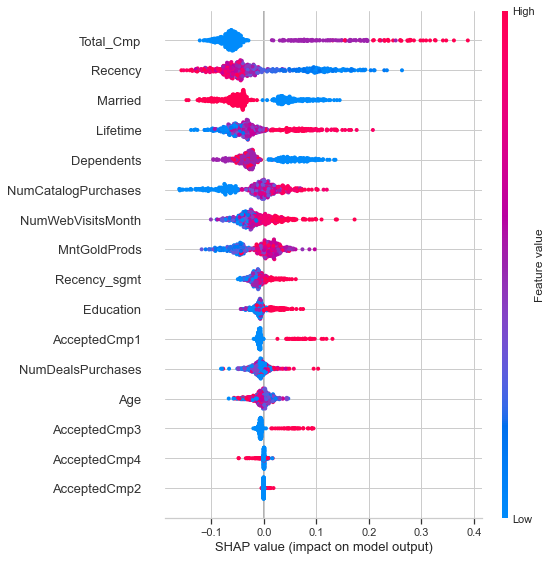

In [159]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

**Observation**

Berdasarkan SHAP diatas, dapat ditemukan beberapa insight sebagai berikut:
- `Total_camp` (total campaign yang pernah diterima/response oleh customer), feature valuenya cenderung berwarna merah yang mengarah kekanan (positif) menunjukkan bahwa `semakin besar shap valuenya maka semakin besar pula  impact/pengaruh nilai untuk memprediksi targetnya`
- `Recency` (total hari terakhir customer berbelanja), feature valuenya cenderung berwarna biru yang mengarah kekanan (positif) menunjukkan bahwa `semakin kecil shap valuenya atau semakin sering customer bebrbelanja maka semakin besar pula impact/pengaruh nilai untuk memprediksi targetnya`
- `Married` (customer yang berstatus belum/sudah menikah), feature valuenya cenderung berwarna biru yang mengarah kekanan (positif) menunjukkan bahwa `semakin kecil shap valuenya atau jika customer belum menikah maka semakin besar pula impact/pengaruh nilai untuk memprediksi targetnya`
- `Lifetime` (total bulan customer berbelanja sejak pembelian pertama), feature valuenya cenderung berwarna merah yang mengarah kekanan (positif) menunjukkan bahwa `semakin besar shap valuenya atau semakin sering/banyak total bulan customer untuk berbelaja maka semakin besar pula  impact/pengaruh nilai untuk memprediksi targetnya`
- `Dependents` (jumlah tanggungan), feature valuenya cenderung berwarna biru yang mengarah kekanan (positif) menunjukkan bahwa `semakin kecil shap valuenya atau jika custmer tidak memiliki tanggungan maka semakin besar pula impact/pengaruh nilai untuk memprediksi targetnya`

### **Feature Importance**

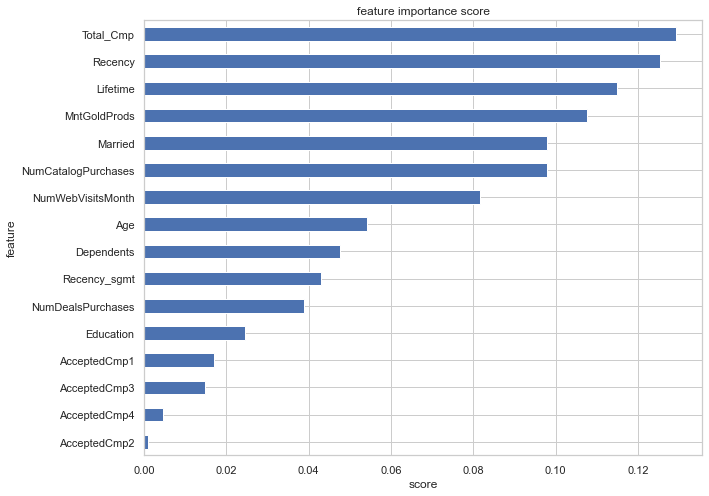

In [160]:
show_feature_importance(rs.best_estimator_)

**Observation**

Berikut adalah Top 10 variabel/feature yang paling berpengaruh terhadap target (`Response`)
- `Total_camp` (total campaign yang pernah diterima/response oleh customer), dengan feature importance score paling tinggi sekitar 0.15
- `Recency` (total hari terakhir customer berbelanja) dengan feature importance score sekitar 0.13
- `Lifetime` (total bulan customer berbelanja sejak pembelian pertama) dengan feature importance score >0.10
- `MntGoldProds` (total purchase Gold Products by customer) dengan feature importance score >0.10
- `Married` (status kawin customer) dengan feature importance score sekitar 0.09
- `NumCatalogPurchases` (pembelian produk melalui katalog) dengan feature importance score sekitar 0.09
- `NumWebVisitMonth` (total pembelian produk melalui Web Visit bulan terakhir) dengan feature importance score >0.08
- `Age` (usia customer) dengan feature importance score sekitar 0.07
- `Dependents` (jumlah tanggungan) dengan feature importance score sekitar 0.05
- `Recency_sgmt` (resency segmentation) dengan feature importance score >0.04

### **Force Plots (Random Forest)**

In [161]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])

**Observation**
Dari Force Plots diatas, menunjukkan bahwa index data testing yang pertama yang `tidak meresponse campaign` dengan informasi yang didapat berdasarkan data tersebut menunjukkan bahwa:
- Customer tidak pernah menerima campaign sebelumnya terbukti dari feature Total_Cmp = 0
- Customer berusia 71 tahun terbukti dari feature Age = 0.71
- Customer sudah menikah terbukti dari feature Married = 1
- Customer tidak sering berbelanja terbukti dari feature Recency = 0.0202

## **📌 Conclusion and Business Recommendation**

**📌Conclusion**

Berdasarkan modelling machine learning menggunakan metode `Random Forest` dengan `Prcision Rate 0.68`, didapatkan Top 3 feature yang paling berpengaruh untuk memprediksi model terhadap target/label `Response` diantaranya adalah:
- `Total_camp` (total campaign yang pernah diterima/response oleh customer)
- `Recency` (total hari terakhir customer berbelanja)
- `Lifetime` (total bulan customer berbelanja sejak pembelian pertama) 

**📌Business Recommendation**

***Actions***
- Memberikan Discount untuk customer yang memilki history response rate <2 atau <3 dari total 5 campaign yang pernah dilakukan

***Area Improvements***
- Meningkatkan Response Rate dan Revenue serta mengurangi Cost biaya campaign dengan menentukan target market yang tepat dilihat dari key features yang sudah ditentukan seperti Total Campaign yang di terima oleh customer, Recency, Lifetime dan sebagainya.

**Reference**
- https://www.sciencedirect.com/science/article/pii/S2090447923001430
- https://www.sciencedirect.com/science/article/abs/pii/S1567422321000302
- https://www.sciencedirect.com/science/article/pii/S2667305323000601


# **====== STAGE 4 ======**
`Stage 4 (Final Preparation & Simulation)`